##### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 8. ML - Algoritmos de aprendizage no supervisado (agrupación)**

**Objectivos**
* Limpieza e interpretación de los datos.
* Preprocesados y PCA.
* Encontrar número de clústeres óptimo
* Creación de modelos no supervisados (k-means y clustering jerárquico).
* Interpretar los resultados.

___________
Entrega: Enviar la URL a un repositorio llamado *ML_unsupervised* que contenga la solución.
URL : **https://github.com/CristinaCosma/ML_unsupervised** 
___________

### **0. Importar las librerías necesarias, cargar el dataset, analizar preparar los datos**

In [550]:
%pip install --upgrade kneed 
# para que luego funcione el comando : from kneed import KneeLocator

Note: you may need to restart the kernel to use updated packages.


In [552]:
# cálculos, dataframes, uso genereal
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import matplotlib.cm as cmimport matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

from matplotlib.colors import ListedColormap
from matplotlib import colormaps

# list(colormaps)from matplotlib.colors import ListedColormap
from matplotlib import colormaps
# list(colormaps)

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Importamos otras librerías necesarias

from datetime import datetime
from scipy.stats import shapiro

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')






**Información del conjunto de datos:**

***Facebook Live Sellers in Thailand*** es un conjunto de datos publicado en abril del 2019 que incluye clientes y comerciantes que venden a través de Facebook Live en Tailandia. Estas publicaciones se extrajeron de las páginas de Facebook de 10 vendedores minoristas de moda y cosméticos tailandeses desde marzo de 2012 hasta junio de 2018. Está preparado para el aprendizaje automático. Los datos contienen 7050 observaciones y doce atributos. Cada registro consta de información sobre el momento en que se publica la información porlos y las interacciones con y entre usuarios, como el hecho de compartir la publicacón, decir si gusta, o transmitir otras emociones. Los detalles y las publicaciones relacionadas con los datos están disponibles en la fuente : 

Facebook Live se ha convertido recientemente en un medio popular de venta directa, especialmente en el este y sudeste de Asia. Ofrece a los pequeños vendedores y autónomos un alto nivel de alcance y participación del consumidor y está revolucionando la venta directa. Este estudio proviene de un análisis de datos de redes sociales extraídos de Facebook para explorar los comportamientos de los usuarios y la efectividad de Facebook Live como herramienta de venta. Los resultados analizan el impacto que ha tenido el uso de Facebook Live en los patrones, la estructura estadística y el grado de participación de los consumidores, así como en la viralidad de las publicaciones. 

Específicamente, los videos en vivo generan más comentarios, reacciones emocionales, intercambio y tiempo de exposición, lo que sugiere un mayor compromiso cognitivo, afectivo y conductual con los vendedores, en comparación con otros tipos de publicaciones en Facebook. También se discuten brevemente las implicaciones y las investigaciones futuras. La variabilidad de la participación del consumidor se analiza a través de un Análisis de Componentes Principales (PCA), destacando los cambios inducidos por el uso de Facebook Live. El componente estacional se analiza mediante un estudio de las medias de las distintas métricas de engagement para diferentes franjas temporales (horaria, diaria y mensual). Finalmente, identificamos publicaciones estadísticas atípicas, que se analizan cualitativamente más a fondo, en términos de su enfoque de venta y actividades.

Fuentes : 

* https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand.
* https://github.com/ikanurlaily/Clustering-Facebook-Sellers-in-Thailand?tab=readme-ov-file#Overview
* https://www.sciencedirect.com/science/article/pii/S2352340920305552


**Información de los campos y descripción de los valores más carácterísticos:**

  * **status_id**: código que identifica una publicación. Parece compuesto de 2 valores: el primero que se repite y que posiblemente identifica al usuario y el segundo que identifica la publicación. Se debería separar en 2 columnas diferentes.

  * **status_type**: el tipo de publicación (por ejemplo, foto, enlace, video, estado).

  * **status_published**:  la fecha y hora de subida de la publicación.
    
  * **num_reactions**: el número total de reacciones recibidas en la publicación.

  * **num_comments**: el número total de comentarios realizados en la publicación.

  * **num_shares**: el número total de veces que la publicación se ha compartido.

  * **num_likes**: el número de reacciones "Me gusta" recibidas en la publicación.

  * **num_loves**: el número de reacciones "Me encanta" recibidas en la publicación.

  * **num_wows**: el número de reacciones "Me asombra" recibidas en la publicación.

  * **num_hahas**: el número de reacciones "Me hace gracia" recibidas en la publicación.

  * **num_sads**: el número de reacciones "Me entristece" recibidas en la publicación.
    
  * **num_angrys**: el número de reacciones "Me enfada" recibidas en la publicación

  * **Column1**, **Column2**, **Column3**, **Column4**: Columnas adicionales que no contienen ningún tipo de datos. Se pueden                                                           borrar del DataFrame.
  

**Objetivo del trabajo:** 

Conocer los patrones de uso, compromiso e interacción a través de métodos estadísticos y de clústering (agrupación) automatizado de Machine Learning.

    
  </div>

In [553]:
fbthai_data= pd.read_csv('PublicacionsFacebookThailandia.csv')
fbthai_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [555]:
fbthai_data.describe().round()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.0,7050.0,7050.0,7050.0,7050.0,7050.0,7050.0,7050.0,7050.0,0.0,0.0,0.0,0.0
mean,230.0,224.0,40.0,215.0,13.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
std,463.0,890.0,132.0,449.0,40.0,9.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
25%,17.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
50%,60.0,4.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
75%,219.0,23.0,4.0,185.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
max,4710.0,20990.0,3424.0,4710.0,657.0,278.0,157.0,51.0,31.0,NaN,NaN,NaN,NaN


In [556]:
fbthai_data.shape

(7050, 16)

In [557]:
fbthai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [558]:
fbthai_data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.0,463.0,0.0,17.0,60.0,219.0,4710.0
num_comments,7050.0,224.0,890.0,0.0,0.0,4.0,23.0,20990.0
num_shares,7050.0,40.0,132.0,0.0,0.0,0.0,4.0,3424.0
num_likes,7050.0,215.0,449.0,0.0,17.0,58.0,185.0,4710.0
num_loves,7050.0,13.0,40.0,0.0,0.0,0.0,3.0,657.0
num_wows,7050.0,1.0,9.0,0.0,0.0,0.0,0.0,278.0
num_hahas,7050.0,1.0,4.0,0.0,0.0,0.0,0.0,157.0
num_sads,7050.0,0.0,2.0,0.0,0.0,0.0,0.0,51.0
num_angrys,7050.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [559]:
# Vemos los valores únicos de cada uno de los atributos
fbthai_data.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

In [76]:
fbthai_data.isnull().sum() | fbthai_data.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [560]:
fbthai_data.duplicated().sum()

51

In [561]:
# 3 ver mejor los campos duplicados

duplicated_data = fbthai_data[fbthai_data['status_id'].duplicated() == True]
duplicated_data #.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0,NaN,NaN,NaN,NaN
1729,246675545449582_429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0,NaN,NaN,NaN,NaN
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0,NaN,NaN,NaN,NaN
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0,NaN,NaN,NaN,NaN
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0,NaN,NaN,NaN,NaN
6224,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0,NaN,NaN,NaN,NaN
6225,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0,NaN,NaN,NaN,NaN
6226,819700534875473_997075427137982,status,6/1/2018 0:35,111,2,1,110,1,0,0,0,0,NaN,NaN,NaN,NaN
6227,819700534875473_995933077252217,photo,5/30/2018 6:33,357,18,9,352,3,1,1,0,0,NaN,NaN,NaN,NaN
6228,819700534875473_995839410594917,photo,5/30/2018 2:39,114,7,0,109,3,2,0,0,0,NaN,NaN,NaN,NaN


In [562]:
duplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1698 to 6271
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         53 non-null     object 
 1   status_type       53 non-null     object 
 2   status_published  53 non-null     object 
 3   num_reactions     53 non-null     int64  
 4   num_comments      53 non-null     int64  
 5   num_shares        53 non-null     int64  
 6   num_likes         53 non-null     int64  
 7   num_loves         53 non-null     int64  
 8   num_wows          53 non-null     int64  
 9   num_hahas         53 non-null     int64  
 10  num_sads          53 non-null     int64  
 11  num_angrys        53 non-null     int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory

In [563]:
# ver el alcance de los elementos duplicados por cada variable
duplicated_data.sum()

status_id           246675545449582_326883450762124246675545449582...
status_type         photophotovideophotophotostatusphotostatusphot...
status_published    10/11/2013 8:239/11/2013 0:126/10/2018 3:436/9...
num_reactions                                                   48337
num_comments                                                     3089
num_shares                                                        390
num_likes                                                       47385
num_loves                                                         489
num_wows                                                          321
num_hahas                                                          25
num_sads                                                           90
num_angrys                                                         27
Column1                                                           0.0
Column2                                                           0.0
Column3             

In [564]:
# ver el total de los valores únicos en los elementos duplicados 
duplicated_data.nunique()

status_id           53
status_type          3
status_published    53
num_reactions       51
num_comments        40
num_shares          20
num_likes           53
num_loves           22
num_wows            18
num_hahas            4
num_sads             7
num_angrys           4
Column1              0
Column2              0
Column3              0
Column4              0
dtype: int64

In [565]:
display(
    fbthai_data[fbthai_data.status_id == '246675545449582_326883450762124'], 
    fbthai_data[fbthai_data.status_id == '819700534875473_1002372733274918'],
    fbthai_data[fbthai_data.status_id == '819700534875473_955149101330615'],
    fbthai_data[fbthai_data.status_id == '819700534875473_951614605017398'],
    fbthai_data[fbthai_data.status_id == '819700534875473_953048221540703'],
    fbthai_data[fbthai_data.status_id == '819700534875473_967787160066809'],
    fbthai_data[fbthai_data.status_id == '819700534875473_966878030157722']
    
)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1488,246675545449582_326883450762124,photo,2/14/2014 3:07,211,2,0,211,0,0,0,0,0,NaN,NaN,NaN,NaN
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0,NaN,NaN,NaN,NaN


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6170,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0,NaN,NaN,NaN,NaN
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0,NaN,NaN,NaN,NaN


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6217,819700534875473_955149101330615,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0,NaN,NaN,NaN,NaN
6268,819700534875473_955149101330615,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0,NaN,NaN,NaN,NaN


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6220,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0,NaN,NaN,NaN,NaN
6271,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0,NaN,NaN,NaN,NaN


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6219,819700534875473_953048221540703,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0,NaN,NaN,NaN,NaN
6270,819700534875473_953048221540703,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0,NaN,NaN,NaN,NaN


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6197,819700534875473_967787160066809,photo,4/11/2018 3:43,4315,24,3,4241,51,19,4,0,0,NaN,NaN,NaN,NaN
6248,819700534875473_967787160066809,photo,4/11/2018 3:43,4315,24,3,4241,51,19,4,0,0,NaN,NaN,NaN,NaN


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6198,819700534875473_966878030157722,photo,4/9/2018 10:49,4114,104,3,4054,36,23,0,1,0,NaN,NaN,NaN,NaN
6249,819700534875473_966878030157722,photo,4/9/2018 10:49,4114,104,3,4054,36,23,0,1,0,NaN,NaN,NaN,NaN


### **Preparar el dataset** : limpieza e interpretación de los datos

* De las muestras evaluadas se desprende que 53 observaciones se encuentran duplicadas al menos dos veces.
* Procederemos y eliminaremos lo duplicado por la columna status_id.

In [566]:
fbthai_data = fbthai_data.drop_duplicates(subset='status_id', keep='last')
data_ndp.shape

(6997, 16)

[Text(0.5, 0, 'Status Type'), Text(0, 0.5, 'Count')]

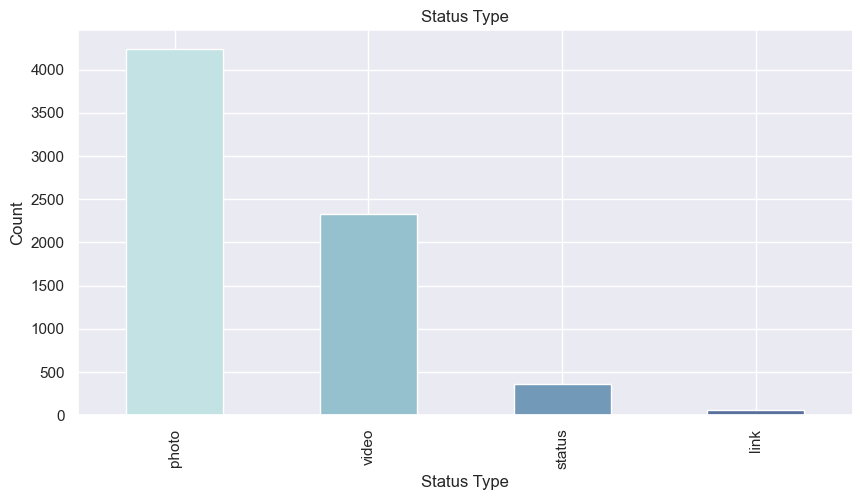

In [567]:
colors = ListedColormap(['#A8CFE8', '#6793B5', '#2E5B88'])

st_ax = fbthai_data.status_type.value_counts().plot(kind='bar', figsize=(10,5), title="Status Type", color=palette)
st_ax.set(xlabel="Status Type", ylabel="Count")

**Observaciones:**
* Ahora solo tenemos 6997 observaciones en el conjunto de datos : exploremos el tipo de estado y otros atributos de los datos para obtener más información.
* La mayoría de los vendedores parecen estar usando una foto o un video como estado de la venta. 
* Sólo una pequeña porción de los usuarios utiliza texto para menconar su estado o la URL/enlace para publicar el anuncio.

**Pasos para seguir :** 
* Las columnas Columna1, Columna2, Columna3, Columna4 no forman parte de los datos originales ni contienen infromación. 
* Es posible que hayan aparecido en los datos debido a la conversión de formato.
* Podemos excluir estas columnas del análisis o convertrlas en datos útiles.
* Separamos la variable "status published" en "day" y "hour" y las ponemos en Column 3 y 4
* Cambiamos el formato de la columna a formato día y hora respectivamente.


---

In [568]:
# Separem la columna status_id en 2 : post_id i id_user i la poso a la Column1 i 2 i els hi canvio el nom. 

fbthai_data[['Column1', 'Column2']] = fbthai_data['status_id'].str.split('_', expand=True)
fbthai_data = fbthai_data.rename(columns={'Column1': 'userID', 'Column2': 'postID'})

fbthai_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,userID,postID,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,1050855161656896,1061863470556065,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,1050855161656896,1061334757275603,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,1050855161656896,1060126464063099,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1050855161656896,1058663487542730,NaN,NaN


In [569]:
fbthai_data[['userID']].value_counts()

userID          
246675545449582     2633
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
dtype: int64

In [570]:
fbthai_data[['postID']].value_counts()

postID          
1000437563406706    1
686322854825203     1
686820254775463     1
686809948109827     1
686449798138819     1
                   ..
236622650232899     1
236507947087320     1
236411473763634     1
236320533596444     1
999880033524188     1
Length: 6997, dtype: int64

In [571]:
# separo la columna con el espacio

fbthai_data[['Column3', 'Column4']] = fbthai_data['status_published'].str.split(' ', expand=True)

fbthai_data = fbthai_data.rename(columns={'Column3': 'day', 'Column4': 'hour'})#canvio el nom a la columna
fbthai_data['day'] = pd.to_datetime(fbthai_data['day']) #Poso format de dia a la columna day

from datetime import datetime #Poso format hora a la columna hour
fbthai_data['hour'] = fbthai_data['hour'].apply(lambda x: datetime.strptime(x, '%H:%M').time())
fbthai_data.drop(columns = ['status_published', 'status_id'], inplace = True) #Elimino les columnes ja transformades
fbthai_data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,userID,postID,day,hour
0,video,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474,2018-04-22,06:00:00
1,photo,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757,2018-04-21,22:45:00
2,video,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397,2018-04-21,06:17:00
3,photo,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452,2018-04-21,02:29:00
4,photo,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,1050855161656896,1061863470556065,2016-09-24,02:58:00
7046,photo,16,0,0,14,1,0,1,0,0,1050855161656896,1061334757275603,2016-09-23,11:19:00
7047,photo,2,0,0,1,1,0,0,0,0,1050855161656896,1060126464063099,2016-09-21,23:03:00
7048,photo,351,12,22,349,2,0,0,0,0,1050855161656896,1058663487542730,2016-09-20,00:43:00


In [572]:
fbthai_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   status_type    6997 non-null   object        
 1   num_reactions  6997 non-null   int64         
 2   num_comments   6997 non-null   int64         
 3   num_shares     6997 non-null   int64         
 4   num_likes      6997 non-null   int64         
 5   num_loves      6997 non-null   int64         
 6   num_wows       6997 non-null   int64         
 7   num_hahas      6997 non-null   int64         
 8   num_sads       6997 non-null   int64         
 9   num_angrys     6997 non-null   int64         
 10  userID         6997 non-null   object        
 11  postID         6997 non-null   object        
 12  day            6997 non-null   datetime64[ns]
 13  hour           6997 non-null   object        
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 820.0+ KB


In [573]:
fbthai_data[fbthai_data.duplicated()]


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,userID,postID,day,hour


In [574]:
fbthai_data_groupby_user=fbthai_data.groupby('userID').count().reset_index()
fbthai_data_groupby_user

,userID,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,postID,day,hour
0,1050855161656896,778,778,778,778,778,778,778,778,778,778,778,778,778
1,117059915488335,56,56,56,56,56,56,56,56,56,56,56,56,56
2,134115277150304,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212
3,146481362756646,125,125,125,125,125,125,125,125,125,125,125,125,125
4,246675545449582,2633,2633,2633,2633,2633,2633,2633,2633,2633,2633,2633,2633,2633
5,614855718638584,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440
6,725980084255106,252,252,252,252,252,252,252,252,252,252,252,252,252
7,819700534875473,51,51,51,51,51,51,51,51,51,51,51,51,51
8,848451358648417,450,450,450,450,450,450,450,450,450,450,450,450,450


* Vemos que hay sólo 9 USUARIOS durante varios años (posiblemente los vendedores), lo que confirma que es un estudio de las interacciones de éstos con su público.
* Intentaremos sacar información de los datos temporales

In [575]:
# Dummy encode 'user_id' column
dummies = pd.get_dummies(fbthai_data['userID'], prefix='ID').astype('int64')

In [576]:
# Concatenate the dummy columns with the original DataFrame
fbthai_data_dummy = pd.concat([fbthai_data, dummies], axis=1)

# Display the updated DataFrame
fbthai_data_dummy

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,hour,ID_1050855161656896,ID_117059915488335,ID_134115277150304,ID_146481362756646,ID_246675545449582,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417
0,video,529,512,262,432,92,3,1,1,0,...,06:00:00,0,0,0,0,1,0,0,0,0
1,photo,150,0,0,150,0,0,0,0,0,...,22:45:00,0,0,0,0,1,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,...,06:17:00,0,0,0,0,1,0,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,...,02:29:00,0,0,0,0,1,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,...,03:22:00,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,...,02:58:00,1,0,0,0,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0,...,11:19:00,1,0,0,0,0,0,0,0,0
7047,photo,2,0,0,1,1,0,0,0,0,...,23:03:00,1,0,0,0,0,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0,...,00:43:00,1,0,0,0,0,0,0,0,0


**Separamos las fechas por días de fin de semana o días laborales :**

In [577]:
fbthai_data_dummy['Saturday'] = fbthai_data_dummy['day'].dt.weekday.isin([5]).astype(int)
fbthai_data_dummy['Sunday'] = fbthai_data_dummy['day'].dt.weekday.isin([6]).astype(int)
fbthai_data_dummy['Workday'] = (fbthai_data_dummy['day'].dt.weekday < 5).astype(int)

fbthai_data_dummy

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,ID_134115277150304,ID_146481362756646,ID_246675545449582,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417,Saturday,Sunday,Workday
0,video,529,512,262,432,92,3,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,photo,150,0,0,150,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,video,227,236,57,204,21,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,photo,111,0,0,111,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,photo,213,0,0,204,9,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7046,photo,16,0,0,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7047,photo,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7048,photo,351,12,22,349,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Separamos las horas en periodos de publicación :**

In [578]:
# separamos las hores en periodos de publicación

def time_of_day(hour):
    if hour.hour >= 6 and hour.hour < 12:
        return 'morning'
    elif hour.hour >= 12 and hour.hour < 22:
        return 'afternoon/evening'
    else:
        return 'night'

fbthai_data_dummy['time_day'] = fbthai_data_dummy['hour'].apply(time_of_day)

# extrayendo los años
fbthai_data_dummy['year'] = fbthai_data_dummy['day'].dt.year

# fbthai_data_dummy = fbthai_data_dummy.drop(['day', 'hour'], axis=1) # eliminar columnas dia y hora ?
fbthai_data_dummy

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,ID_246675545449582,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417,Saturday,Sunday,Workday,time_day,year
0,video,529,512,262,432,92,3,1,1,0,...,1,0,0,0,0,0,1,0,morning,2018
1,photo,150,0,0,150,0,0,0,0,0,...,1,0,0,0,0,1,0,0,night,2018
2,video,227,236,57,204,21,1,1,0,0,...,1,0,0,0,0,1,0,0,morning,2018
3,photo,111,0,0,111,0,0,0,0,0,...,1,0,0,0,0,1,0,0,night,2018
4,photo,213,0,0,204,9,0,0,0,0,...,1,0,0,0,0,0,0,1,night,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,...,0,0,0,0,0,1,0,0,night,2016
7046,photo,16,0,0,14,1,0,1,0,0,...,0,0,0,0,0,0,0,1,morning,2016
7047,photo,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,night,2016
7048,photo,351,12,22,349,2,0,0,0,0,...,0,0,0,0,0,0,0,1,night,2016


In [579]:
fbthai_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 7049
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   status_type          6997 non-null   object        
 1   num_reactions        6997 non-null   int64         
 2   num_comments         6997 non-null   int64         
 3   num_shares           6997 non-null   int64         
 4   num_likes            6997 non-null   int64         
 5   num_loves            6997 non-null   int64         
 6   num_wows             6997 non-null   int64         
 7   num_hahas            6997 non-null   int64         
 8   num_sads             6997 non-null   int64         
 9   num_angrys           6997 non-null   int64         
 10  userID               6997 non-null   object        
 11  postID               6997 non-null   object        
 12  day                  6997 non-null   datetime64[ns]
 13  hour                 6997 non-nul

**Agroupar data por status_type + calcular la suma de las interacciones medidas:**

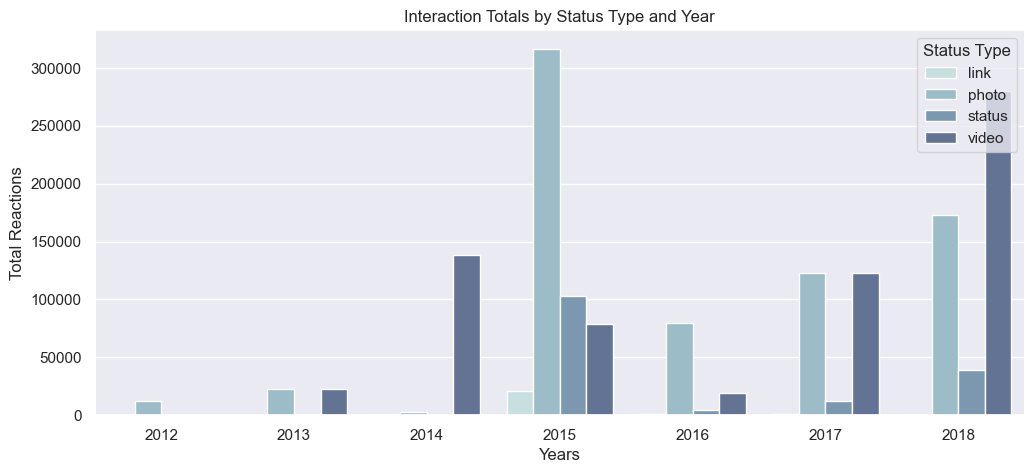

In [580]:
# Agroupar data por status_type + calcular la suma de las interacciones medidas

data_status_year = fbthai_data_dummy.groupby(['status_type', 'year'])[['num_reactions', 'num_comments', 'num_shares', 'num_likes']].sum()
data_status_year = data_status_year.reset_index()
color = palette

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=data_status_year, x='year', y='num_reactions', hue='status_type', ax=ax, palette=color)
ax.set_xlabel('Years')
ax.set_ylabel('Total Reactions')
ax.set_title('Interaction Totals by Status Type and Year')
plt.legend(title='Status Type')
plt.show()


**Exploramos las interacciones por tipo de medio (Status_type) al año y por Tipos de interacciones en distintos momentos del día :**
* Vemos que es en 2015 que hubo más  interacciones, segiuodo de 2018 y 2017
* Se usan muchas fotos, pero aumenta con el tiempo el número de vídeos
* Por la tarde (de 12h a 22h), es cuando hay menos interacciones, por lo que podemos pensar que la gente está ocupada trabajando u ocupándose de su hogar y su família
* Aparentemente, las publicaciones generan una cantidad parecida de reacciones por la mañana (de 5h a 12h) que por la noche (de 22h a las 5h del día siguiente), pero cambia laproporción en cuanto a los tipos 
* Por la mañana se generan más comentarios escritos mientras de noche predominan las reacciones cortas y los "likes"
* Podrámos pensar que se trabaja muchas horas de día y se duerme poco por la noche, cuando hay mucha actividad en la red social...

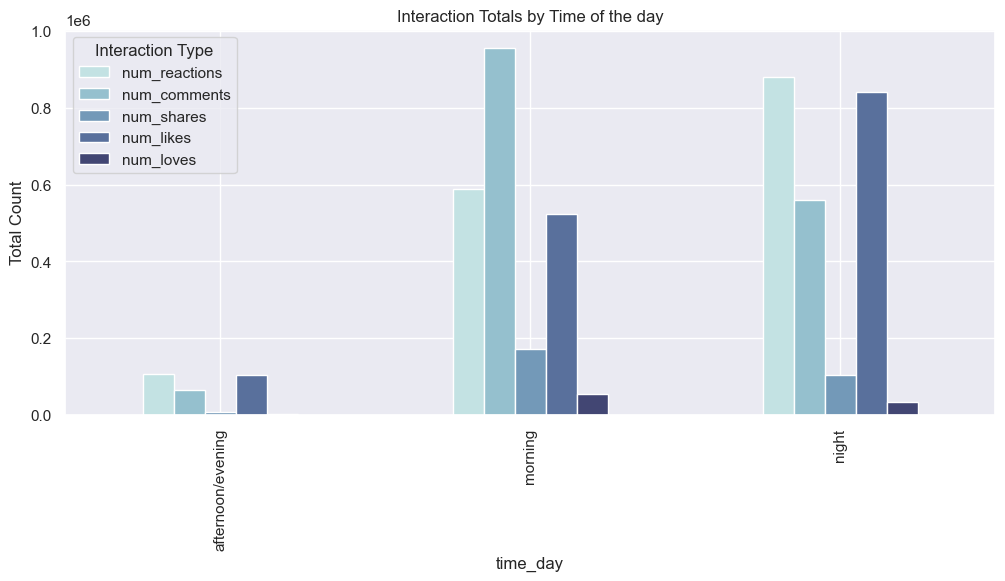

In [622]:
data_status_timeday = fbthai_data_dummy.groupby('time_day')[['num_reactions', 'num_comments', 'num_shares', 'num_likes','num_loves']].sum()
data_status_timeday = data_status_timeday.reset_index()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 5))

# Generate the grouped bar plot

data_status_timeday.plot(kind='bar', x='time_day', y=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves'], ax=ax, color = palette)
ax.set_ylabel('Total Count')
ax.set_title('Interaction Totals by Time of the day')
plt.legend(title='Interaction Type')

plt.show()

**Visualizamos la actividad por momentos de la semana, por años y por el usuario (vendedor) :**
* Veremos que el día de la semana que más actividad tiene es el sábado,pudiendo tratarse incluso de la noche del viernes al sábado, con máscomentarios excritos, más reacciones y likes
* Sorprendentemente, los domingos parace que hay el mismo nivel de actividad que un día laboral.
* Al año, vemos que los comentarios han sido sobretodo en 2017 y 2018 ; hasta aquél entonces había casi unicamente reacciones (quizás "ok - pulgar") y likes.
* Los clientes de la plataforma se han hecho más participativos desde el 2017.
* El usuario (vendedor) cuyo número termina en 82 es con diferenca el que genera más reacciones en general y más "likes".
* El usuario (vendedor) cuyo número termina en 96 es el que genera más comentarios
* Los usuarios (vendedores) cuyos números terminan en 17 y en 35 son los que menos interacciones generan.
* Observamos relativamente pocos "loves"


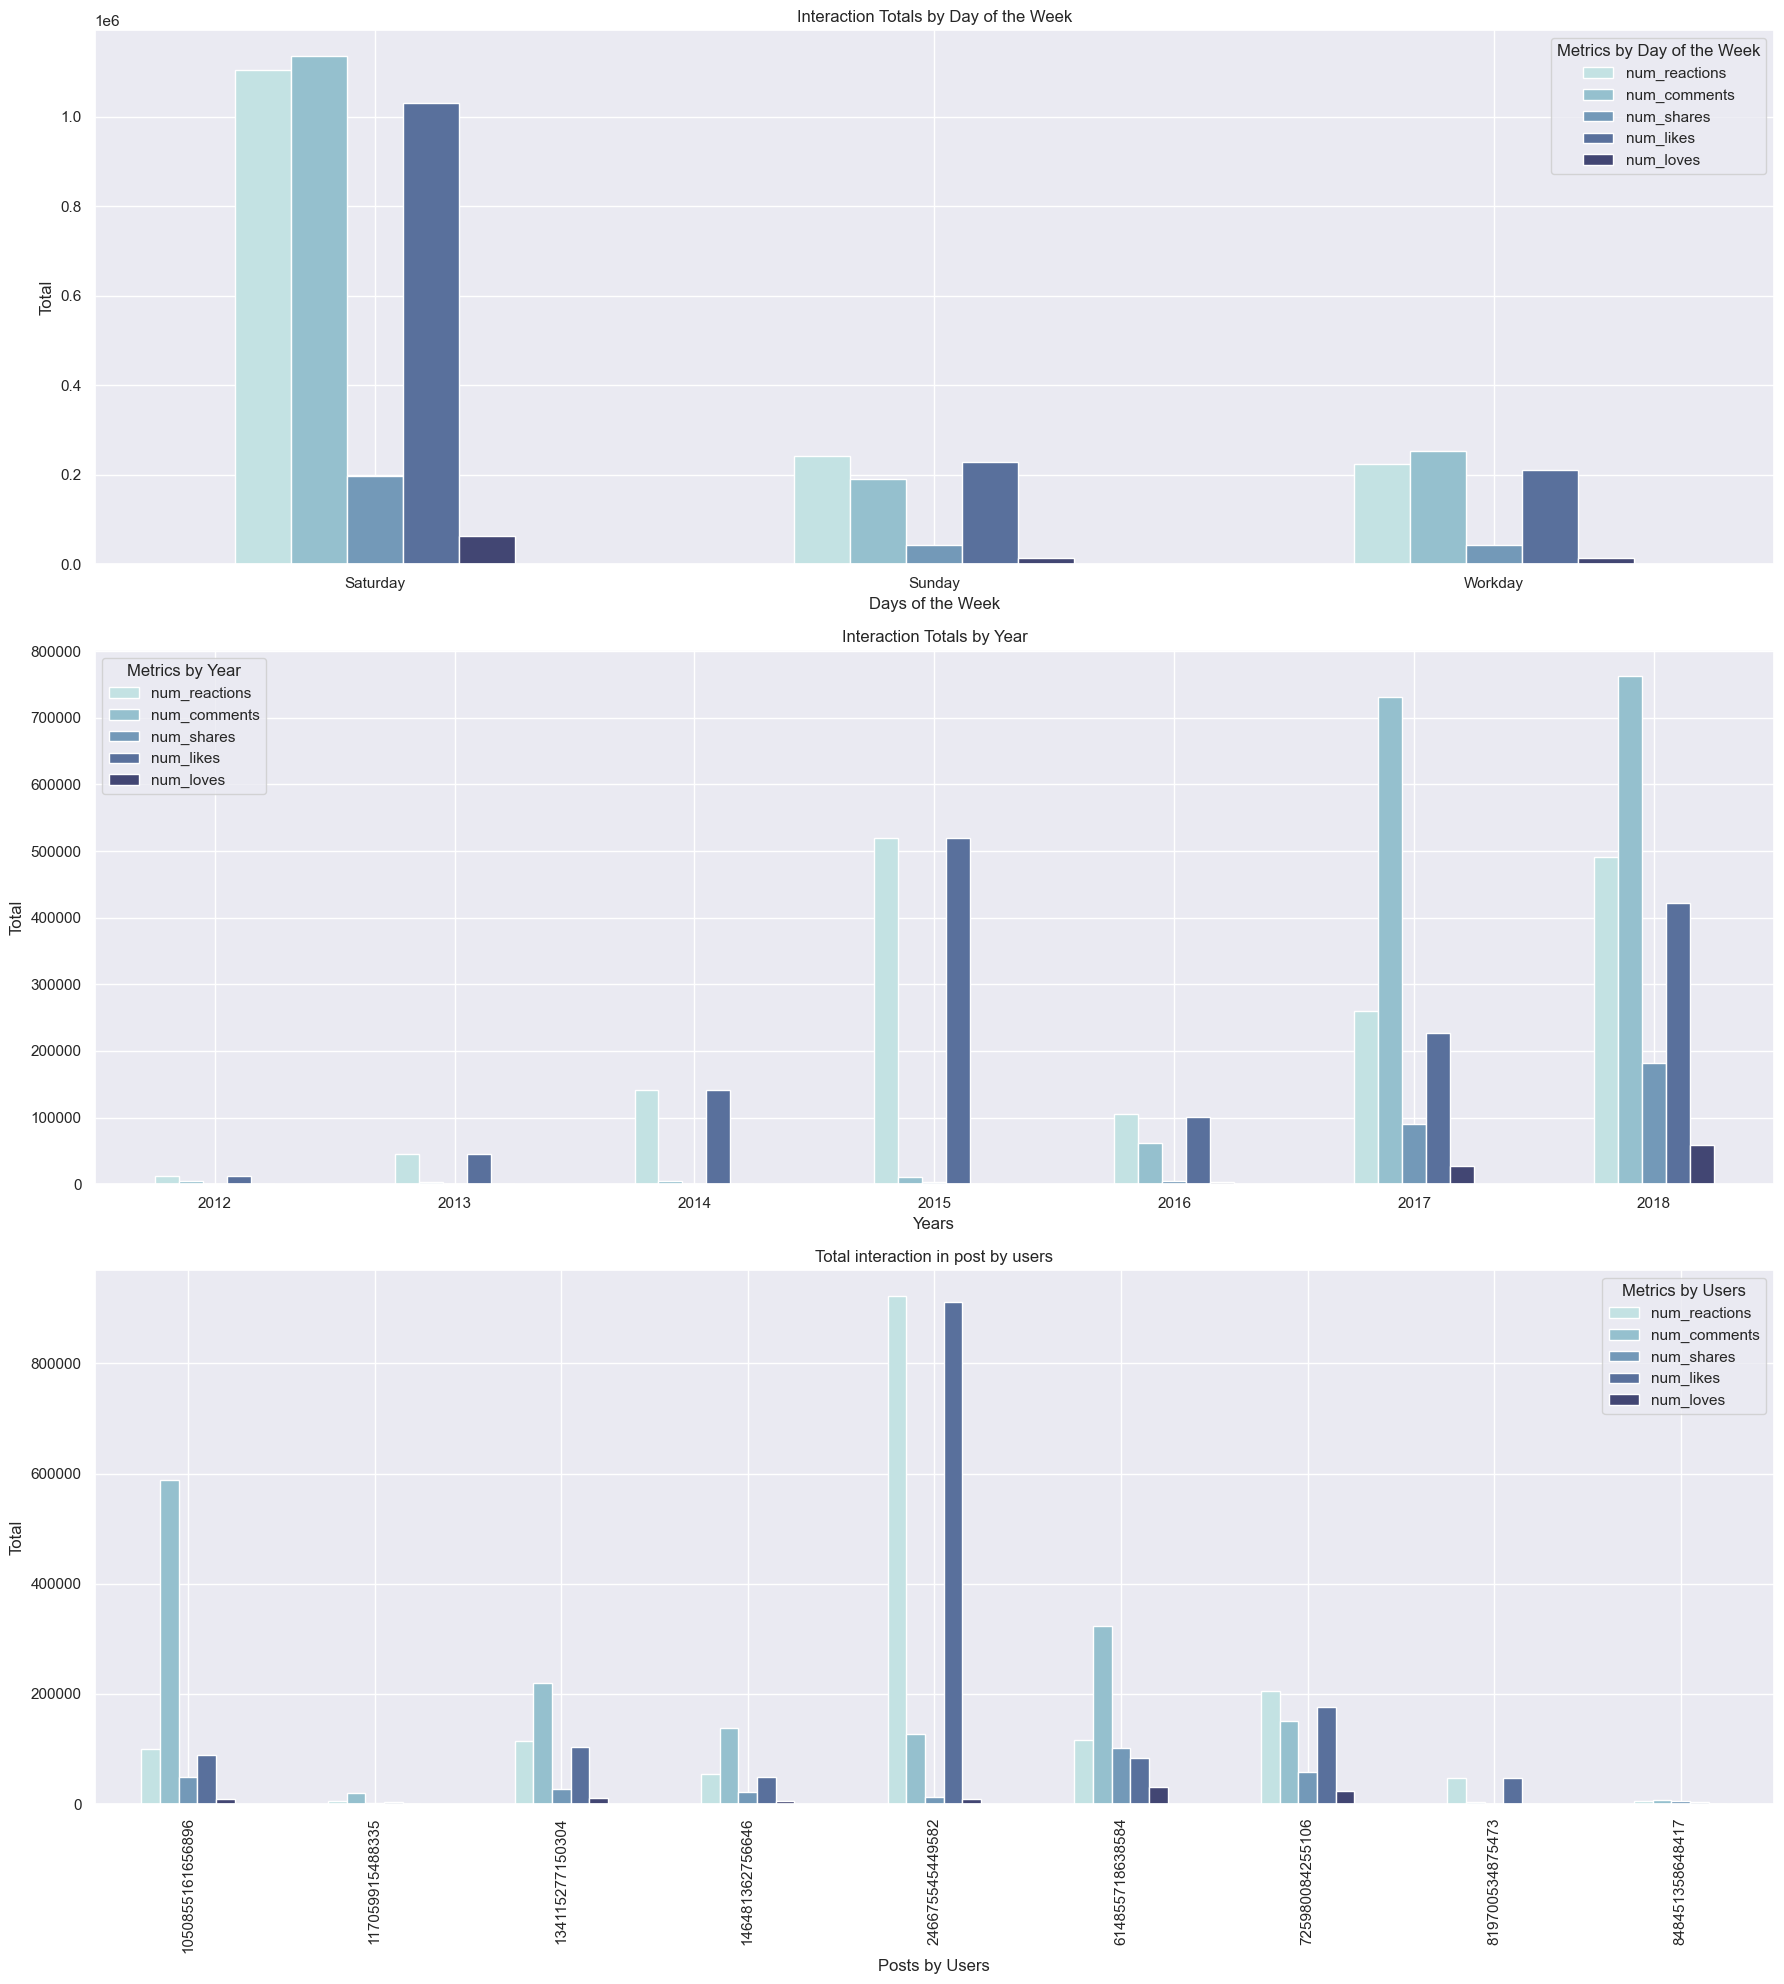

In [581]:
# Datos para el gráfico
dataday = fbthai_data_dummy.groupby(['Saturday', 'Sunday', 'Workday'])[['num_reactions', 'num_comments', 'num_shares', 'num_likes','num_loves']].sum()
datayear = fbthai_data_dummy.groupby('year')[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']].sum()
datapost = fbthai_data_dummy.groupby(['userID'])[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']].sum()

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 20))

# Gràfico dia
dataday.plot(kind='bar', ax=axs[0], color = palette)
axs[0].set_xticklabels(['Saturday', 'Sunday', 'Workday'], rotation=0)
axs[0].set_xlabel('Days of the Week')
axs[0].set_ylabel('Total')
axs[0].set_title('Interaction Totals by Day of the Week')
axs[0].legend(title='Metrics by Day of the Week')

# Gràfic0 año
datayear.plot(kind='bar', ax=axs[1], color = palette)
axs[1].set_xticklabels(datayear.index, rotation=0)
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Total')
axs[1].set_title('Interaction Totals by Year')
axs[1].legend(title='Metrics by Year')

# Gràfico userID
datapost.plot(kind='bar', ax=axs[2], color = palette)

# axs[2].set_xticklabels(['userID'], rotation=90)
axs[2].set_xlabel('Posts by Users')
axs[2].set_ylabel('Total')
axs[2].set_title('Total interaction in post by users')
axs[2].legend(title='Metrics by Users')
plt.tight_layout()

plt.show()

In [623]:
# Copiamos los datos antes de dumificar 
fbthai_data2 = fbthai_data1.copy()

# Convertimos variables categoricas en dummies numericas 
fbthai_dum = pd.get_dummies(fbthai_data2, columns=["status_type", "time_day","year"], prefix=["media", "","year"], drop_first=True)

# Drop the original categorical columns
fbthai_data2.drop(['status_type', 'time_day','year'], axis=1, inplace=True)
fbthai_dum = fbthai_dum.astype('int64')

# Concatenate the dummy columns with the original DataFrame
fbthai_data2 = pd.concat([fbthai_dum], axis=1)

# Show the updated DataFrame
# fbthai_data2.info()


In [624]:
# Eliminar la variable id_user ? -> podríamos pero no, a ver si influye.

fbthaifinal_data = fbthai_data2 # .drop(['userID'], axis=1) 

In [584]:
fbthaifinal_data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6997.0,2.250000e+02,4.530000e+02,0.000000e+00,1.700000e+01,5.800000e+01,2.160000e+02,4.710000e+03
num_comments,6997.0,2.260000e+02,8.930000e+02,0.000000e+00,0.000000e+00,4.000000e+00,2.200000e+01,2.099000e+04
num_shares,6997.0,4.000000e+01,1.320000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,3.424000e+03
num_likes,6997.0,2.100000e+02,4.400000e+02,0.000000e+00,1.700000e+01,5.700000e+01,1.820000e+02,4.710000e+03
num_loves,6997.0,1.300000e+01,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,6.570000e+02
num_wows,6997.0,1.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.780000e+02
num_hahas,6997.0,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.570000e+02
num_sads,6997.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.100000e+01
num_angrys,6997.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01
userID,6997.0,4.496816e+14,3.083394e+14,1.170599e+14,2.466755e+14,2.466755e+14,6.148557e+14,1.050855e+15


**Comentario :**

* El análisis de las variables de interacción revela una alta dispersión de los valores. 
* Hay una gran variabilidad, indicando que no existe un crecimiento proporcional entre estos valores. 
* La desviación estándar es notablemente alta, sugiriendo la presencia de observaciones anómalas u outliers en los datos. Esto también nos permite observar los valores mínimos y máximos de las distintas variables numéricas, evidenciando una amplia gama de valores. 
* Esto sin embargo no debería ser sorprendente, puesto que las reacciones son subjetivas y es perfectamente posible encontrar valores mínimos de 0 y máximos muy altos, como sucede con las interacciones "likes".

In [585]:
fbthaifinal_data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,userID,...,media_status,media_video,_morning,_night,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,529,512,262,432,92,3,1,1,0,246675545449582,...,0,1,0,1,0,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,246675545449582,...,0,0,0,0,0,0,0,0,0,1
2,227,236,57,204,21,1,1,0,0,246675545449582,...,0,1,0,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,246675545449582,...,0,0,0,1,0,0,0,0,0,1
4,213,0,0,204,9,0,0,0,0,246675545449582,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,1050855161656896,...,0,0,0,1,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,1050855161656896,...,0,0,1,0,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,1050855161656896,...,0,0,0,1,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,1050855161656896,...,0,0,0,1,0,0,0,1,0,0


**Para seguir con el aprendizaje NO supervisado :**

- La variable target por la que hacer predicciones podría ser status_type (foto, video, link, share) o también el userID
- Se ha hecho la dumificación de Saturday, Sunday, Workday
- La variables de tiempo year se convertirá en numérica para ejecutar el K-means
- Para el estudio se tendrán en cuenta las siguientes variables: num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads y num_angrys.
- userID se considerará como categórica ya que es un índice de 9 usuarios / vendedores.

<Figure size 800x500 with 0 Axes>

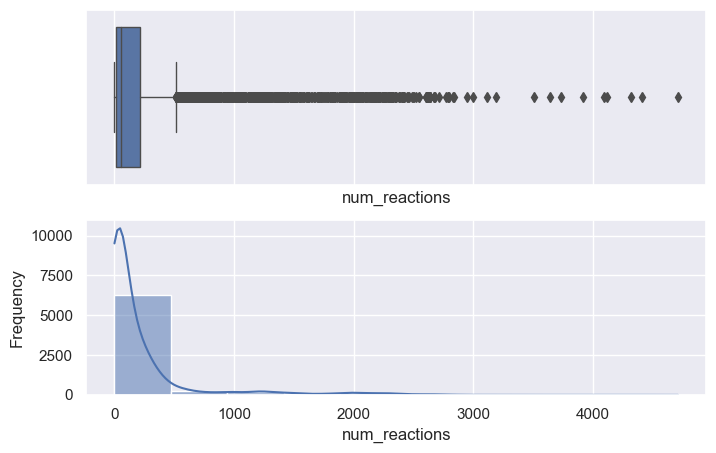

<Figure size 800x500 with 0 Axes>

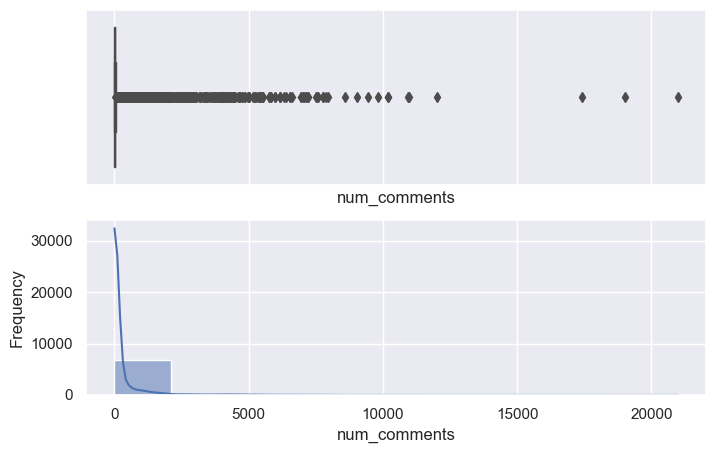

<Figure size 800x500 with 0 Axes>

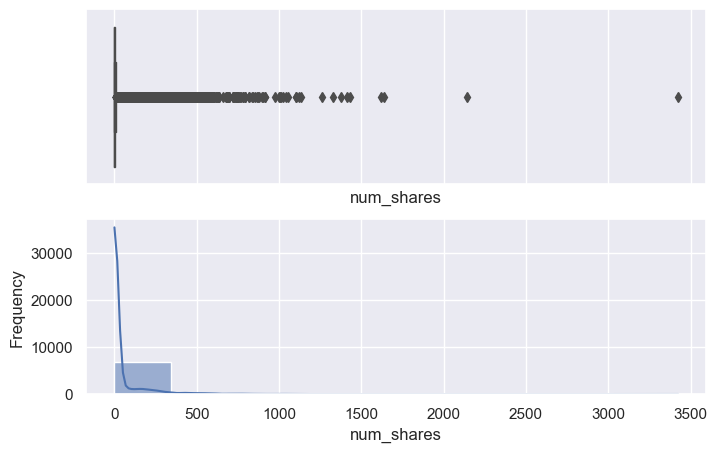

<Figure size 800x500 with 0 Axes>

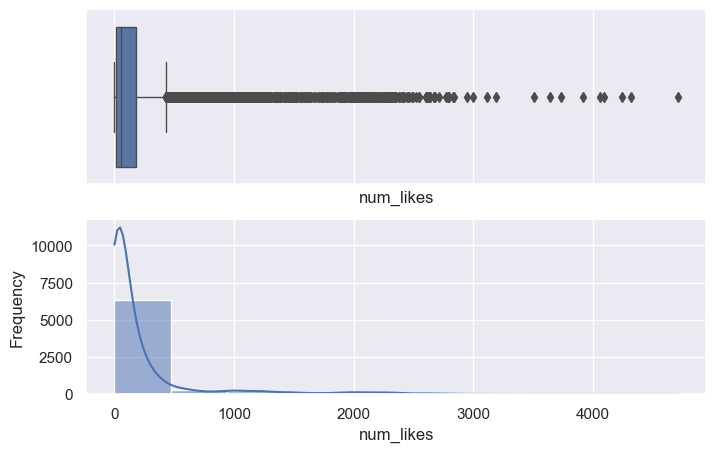

<Figure size 800x500 with 0 Axes>

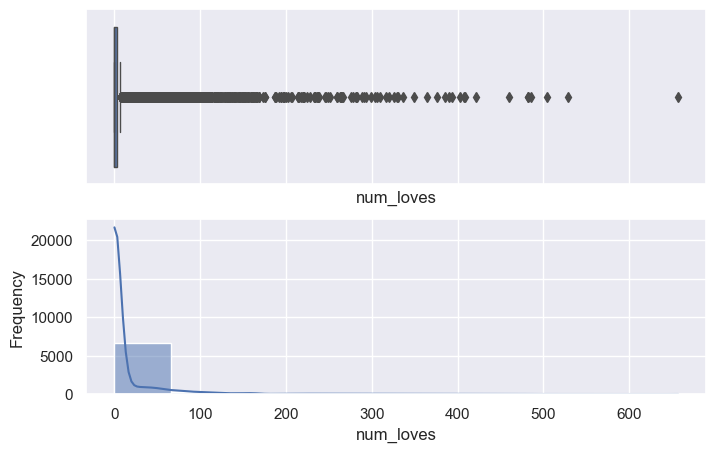

<Figure size 800x500 with 0 Axes>

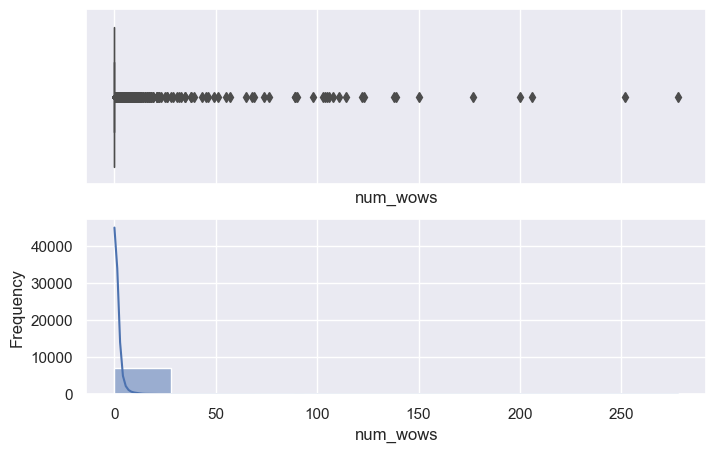

<Figure size 800x500 with 0 Axes>

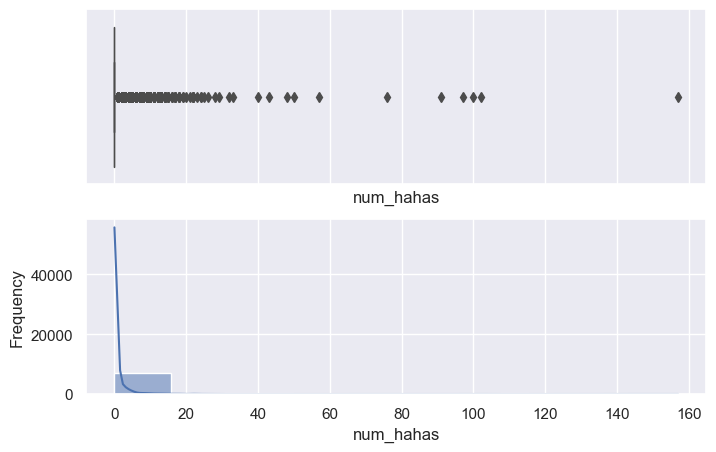

<Figure size 800x500 with 0 Axes>

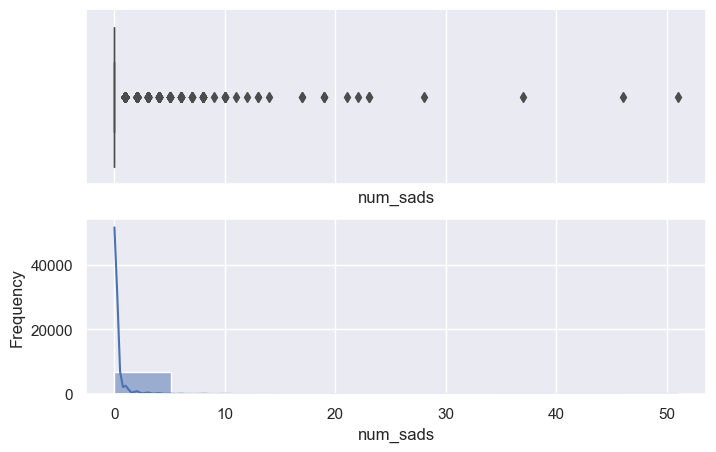

<Figure size 800x500 with 0 Axes>

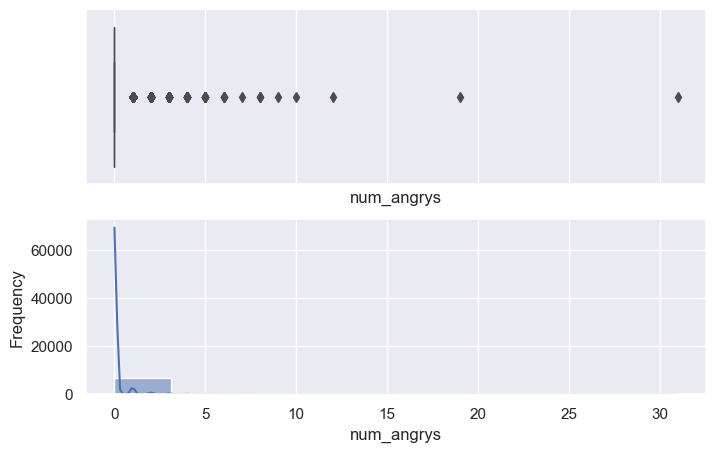

<Figure size 800x500 with 0 Axes>

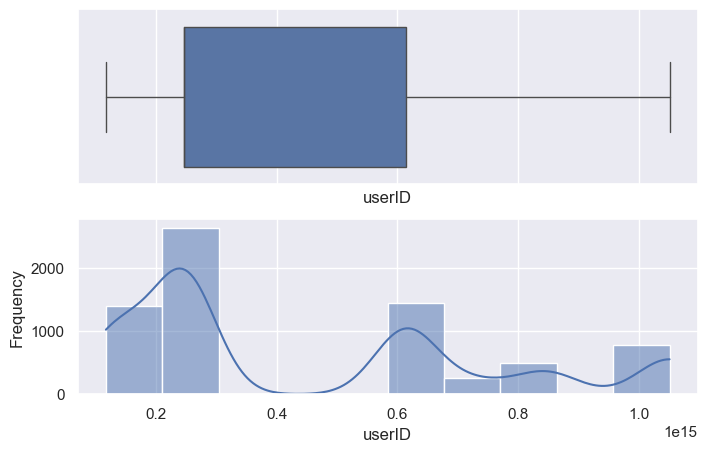

<Figure size 800x500 with 0 Axes>

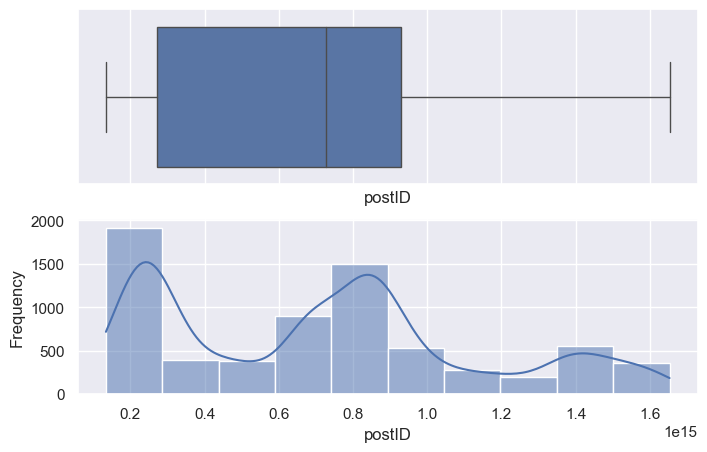

<Figure size 800x500 with 0 Axes>

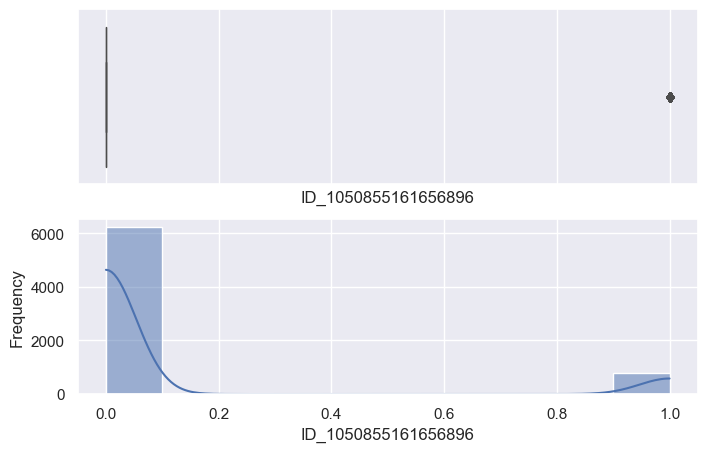

<Figure size 800x500 with 0 Axes>

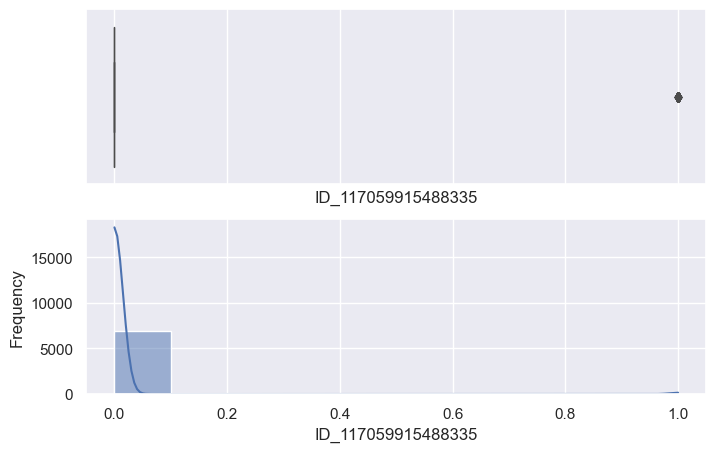

<Figure size 800x500 with 0 Axes>

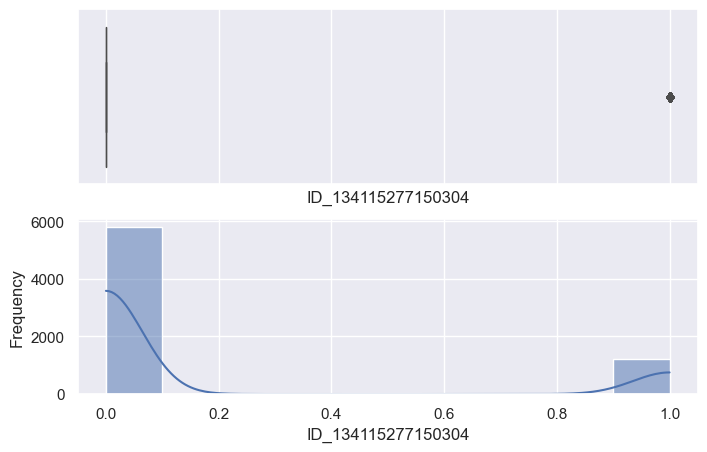

<Figure size 800x500 with 0 Axes>

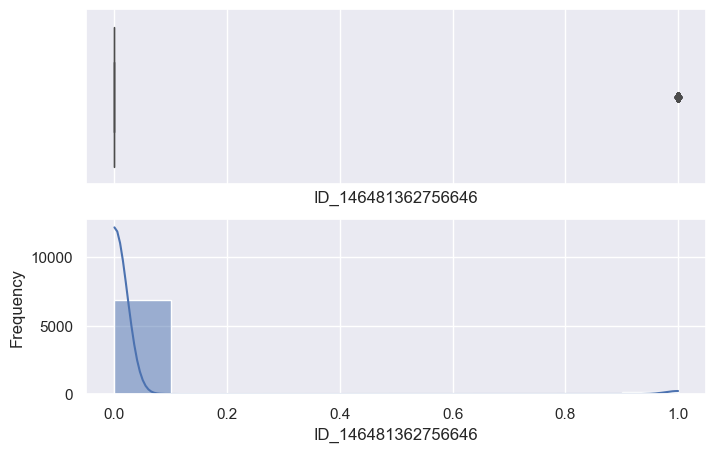

<Figure size 800x500 with 0 Axes>

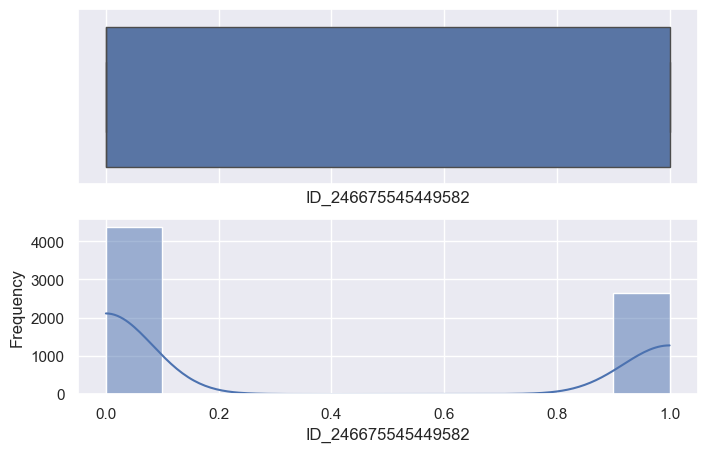

<Figure size 800x500 with 0 Axes>

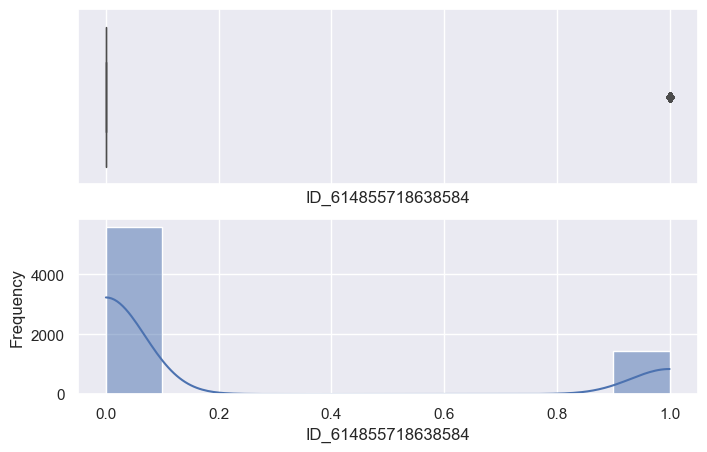

<Figure size 800x500 with 0 Axes>

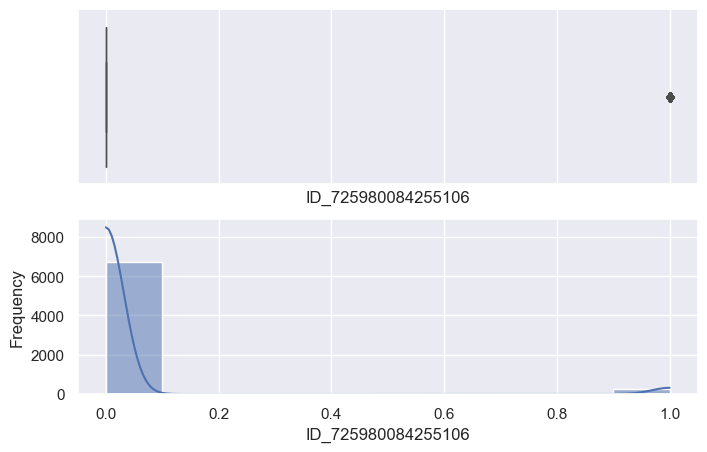

<Figure size 800x500 with 0 Axes>

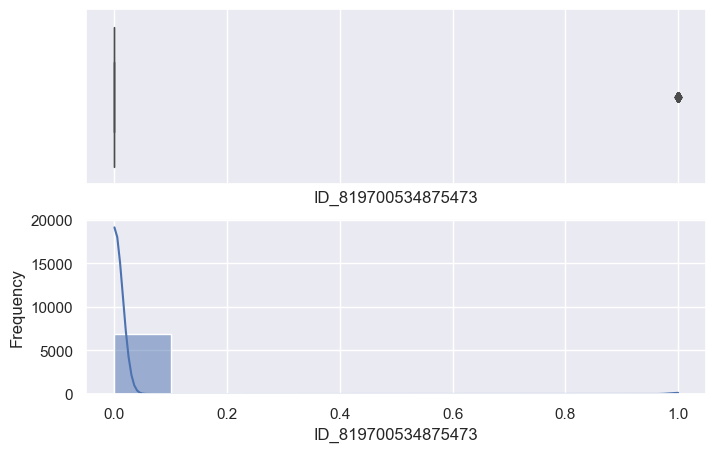

<Figure size 800x500 with 0 Axes>

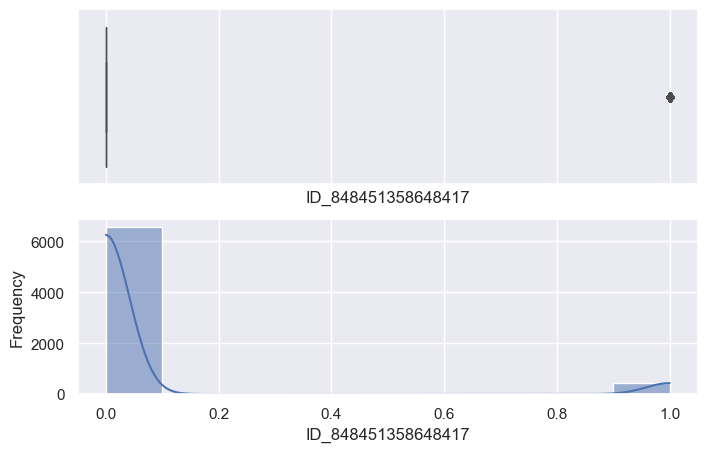

<Figure size 800x500 with 0 Axes>

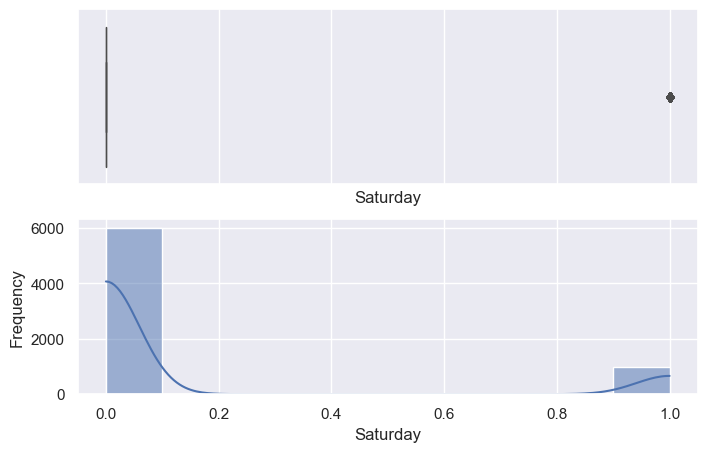

<Figure size 800x500 with 0 Axes>

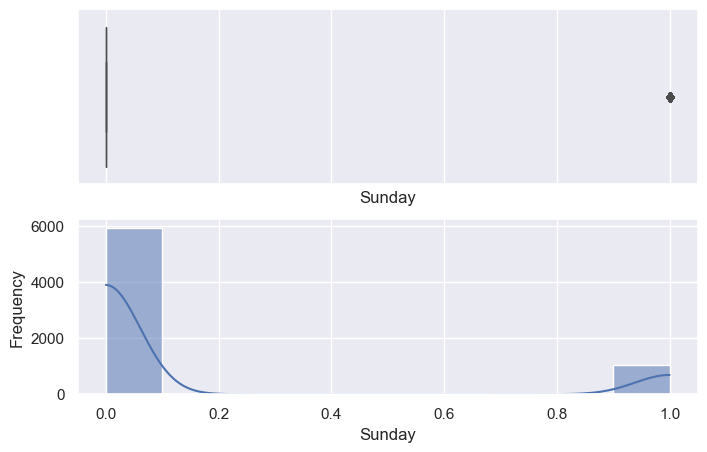

<Figure size 800x500 with 0 Axes>

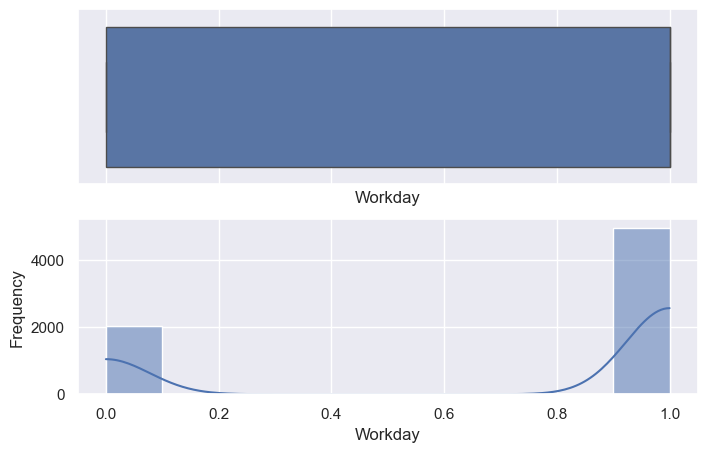

<Figure size 800x500 with 0 Axes>

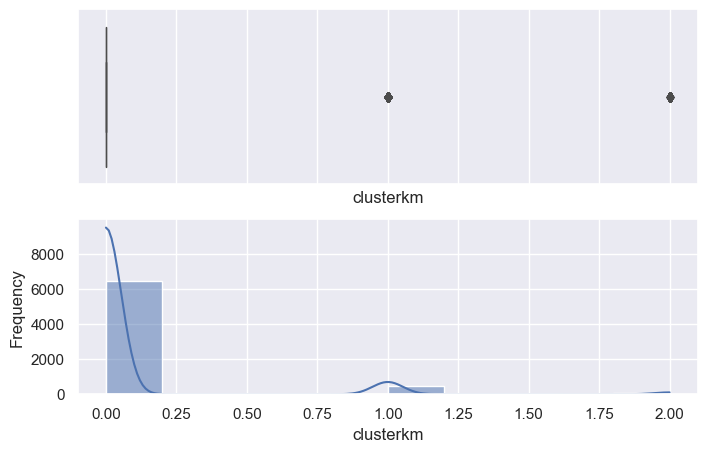

<Figure size 800x500 with 0 Axes>

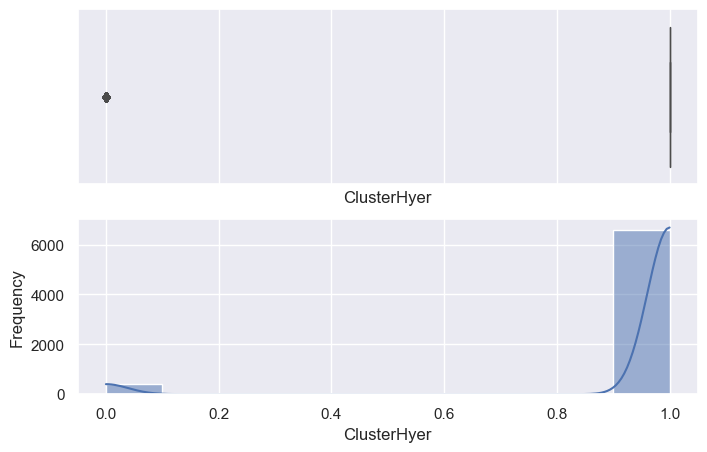

<Figure size 800x500 with 0 Axes>

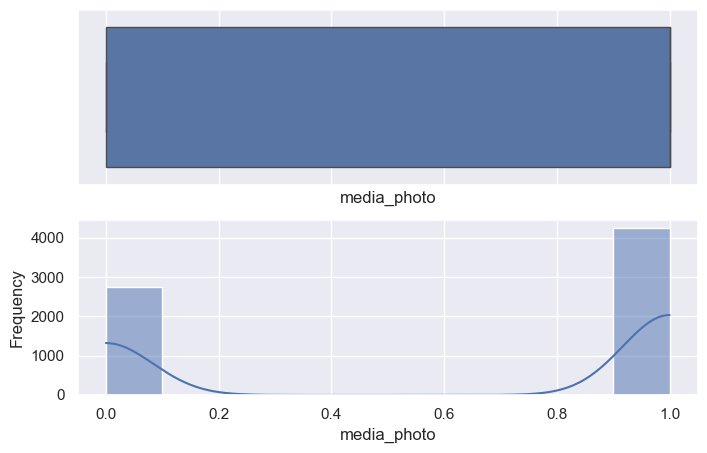

<Figure size 800x500 with 0 Axes>

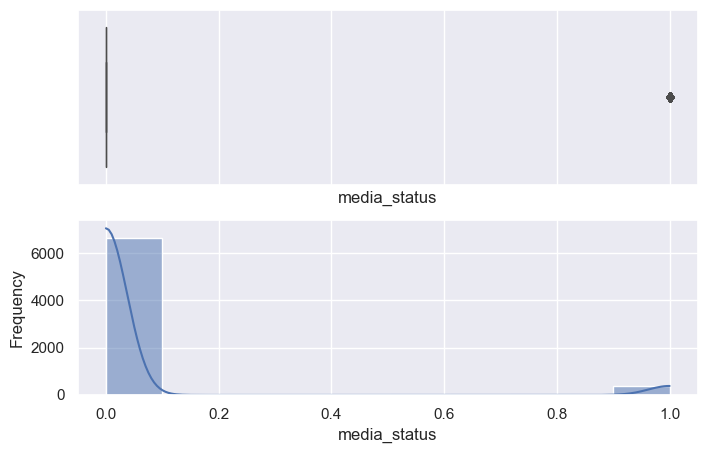

<Figure size 800x500 with 0 Axes>

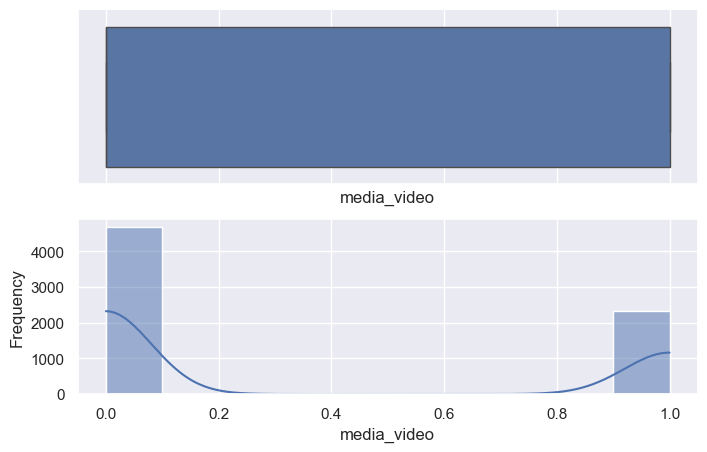

<Figure size 800x500 with 0 Axes>

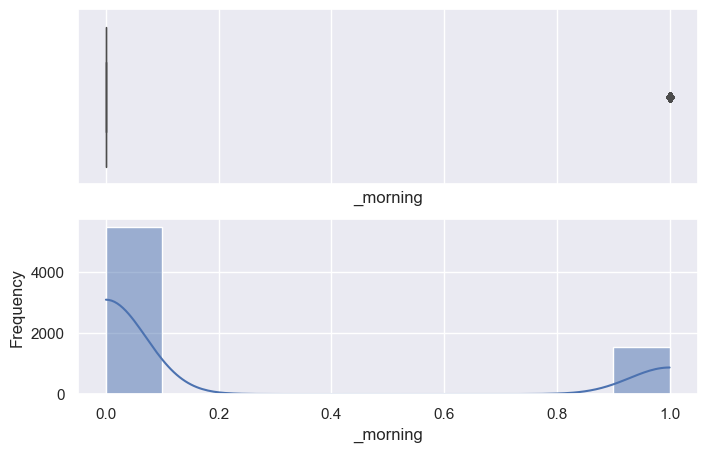

<Figure size 800x500 with 0 Axes>

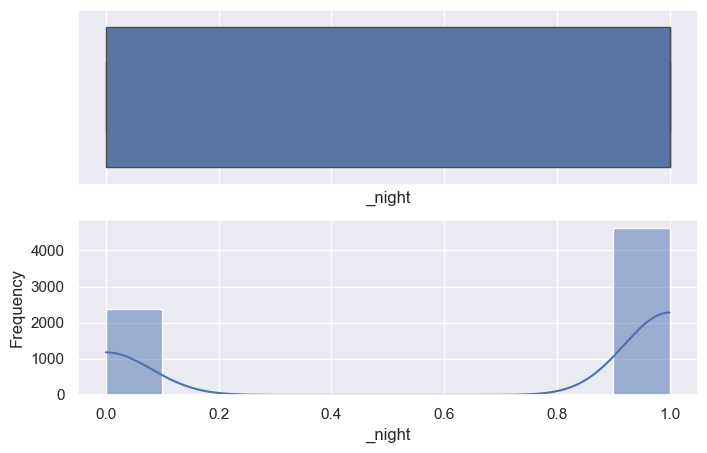

<Figure size 800x500 with 0 Axes>

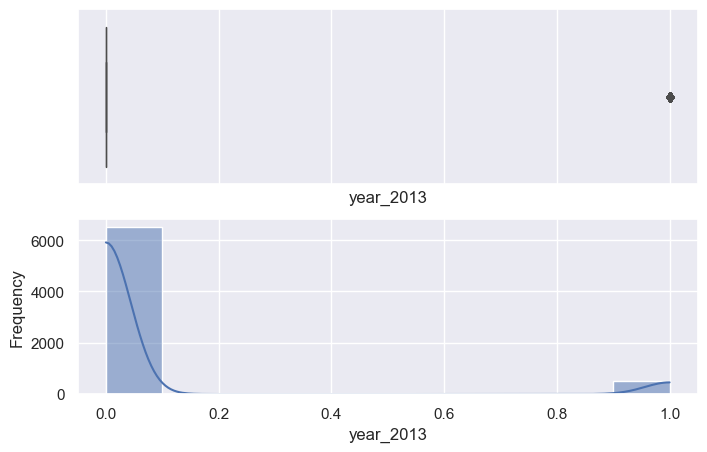

<Figure size 800x500 with 0 Axes>

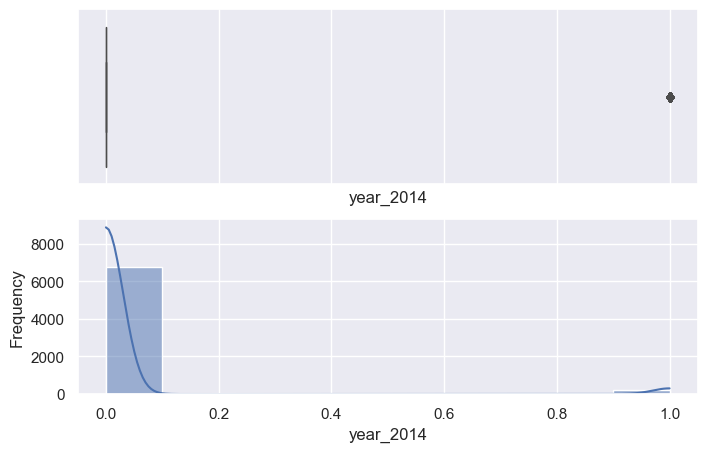

<Figure size 800x500 with 0 Axes>

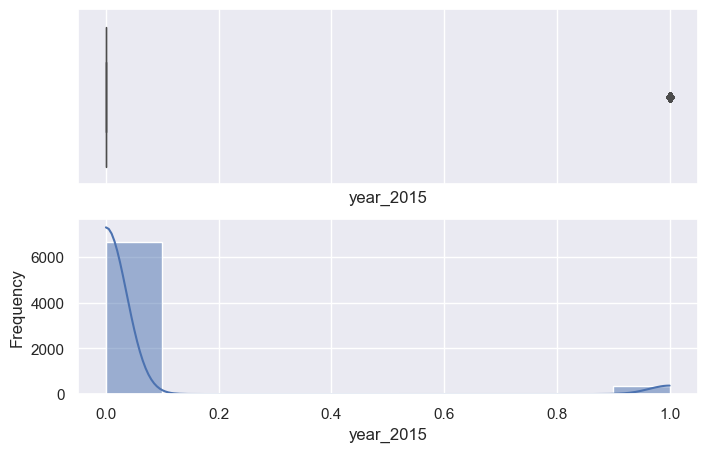

<Figure size 800x500 with 0 Axes>

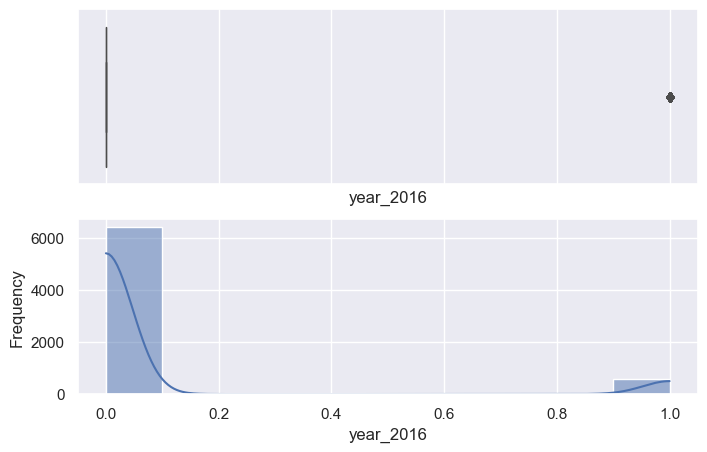

<Figure size 800x500 with 0 Axes>

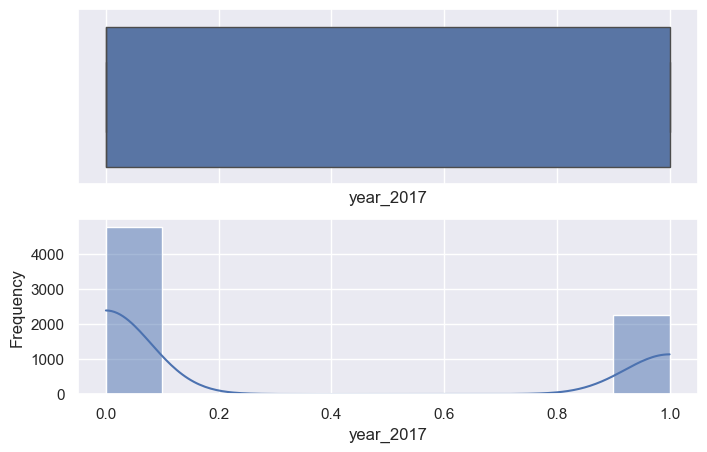

<Figure size 800x500 with 0 Axes>

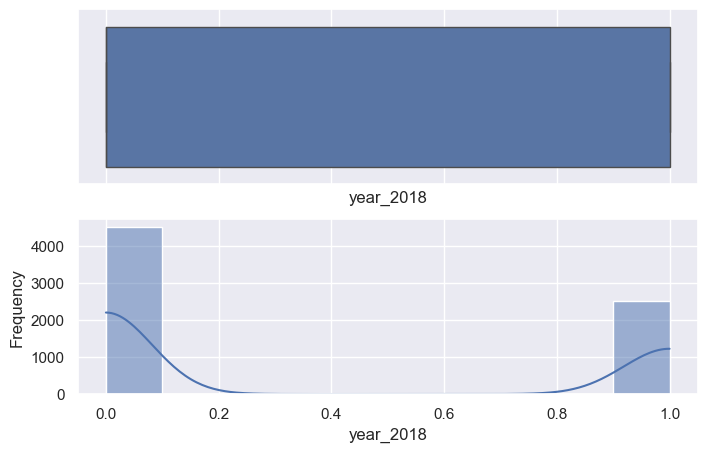

In [586]:
#Obtenemos de forma gráfica un boxPlot de los valores numéricos

for i in fbthaifinal_data.select_dtypes(include=['float','int']):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i, ylabel='Frequency')
    sns.boxplot(fbthaifinal_data[i],  ax=ax_box , orient = 'h', linewidth= 1.0)
    sns.histplot(fbthaifinal_data[i], ax=ax_hist , bins = 10,kde=True)

* Se puede ver gráficamente que ninguna variable es gausiana y muchas tienen outliers, pero haremos el estudio de la hipótesis de Shapiro por comprobar.
* Las variables categoricas ya las hemos convertido en dummias y las tenemos escaladas entre 0 y 1 y no hace falta hacer otro preprocesado
* Muchas de las publicaciones no generaron reacción, por tanto, hay bastantes valores "0".

In [587]:
# Comprobamos mediante shapiro qué variables presentan distribución gaussinana : sólo Alcalinity of ash es el único que presenta una distribución normal.

from scipy.stats import shapiro
import colorama
from colorama import Fore, Style

col = list(fbthaifinal_data.columns)
def distr_normal(fbthaifinal_data):
    normal = []    
    for col in fbthaifinal_data.columns:
        p_valor = shapiro_test.pvalue
        normal.append(p_valor > 0.05)
    return normal
resultado = distr_normal(fbthaifinal_data)

for resultado in resultado :
    if resultado is True : 
        print(Fore.GREEN, resultado, Style.RESET_ALL)
    else :
        print( Fore.RED, resultado, Style.RESET_ALL)

 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 


In [588]:
# Robust Scaler 
Robust_scaler = preprocessing.RobustScaler().fit(fbthaifinal_data[num_columns])
fbthaifinal_data[num_columns] = Robust_scaler.transform(fbthaifinal_data[num_columns])

# Show how is it looks like now df
fbthaifinal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 7049
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_reactions        6997 non-null   float64
 1   num_comments         6997 non-null   float64
 2   num_shares           6997 non-null   float64
 3   num_likes            6997 non-null   float64
 4   num_loves            6997 non-null   float64
 5   num_wows             6997 non-null   float64
 6   num_hahas            6997 non-null   float64
 7   num_sads             6997 non-null   float64
 8   num_angrys           6997 non-null   float64
 9   userID               6997 non-null   int64  
 10  postID               6997 non-null   int64  
 11  ID_1050855161656896  6997 non-null   int64  
 12  ID_117059915488335   6997 non-null   int64  
 13  ID_134115277150304   6997 non-null   int64  
 14  ID_146481362756646   6997 non-null   int64  
 15  ID_246675545449582   6997 non-null   i

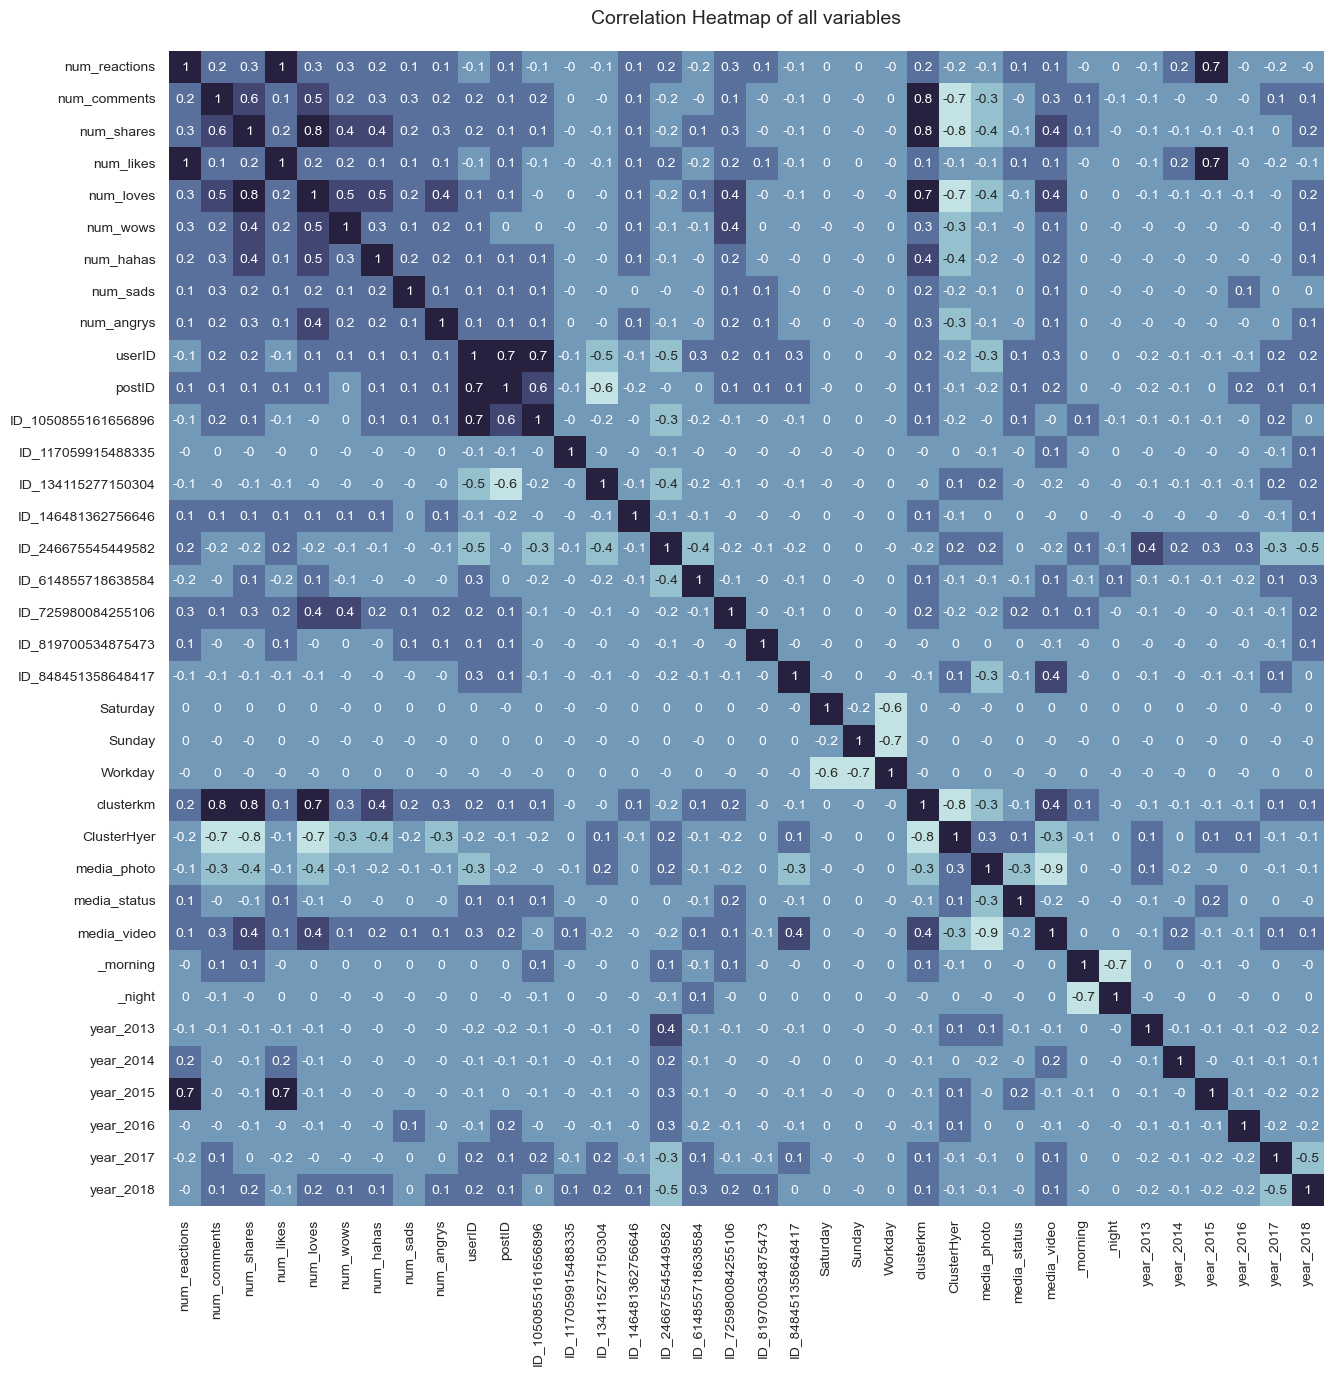

In [589]:
plt.figure(figsize=(20, 15))

# Increase font size for variable names
xticklabels_fontsize = 10
yticklabels_fontsize = 10
annot_fontsize = 10

# Generate the correlation matrix
corr_matrix = fbthaifinal_data.corr().round(1)
cmap = sns.color_palette("ch:start=.2,rot=-.3")

# Plot the heatmap with adjusted font sizes
sns.heatmap(corr_matrix, annot=True, cmap=cmap, annot_kws={'fontsize': annot_fontsize},
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            cbar=False, square=True)

# Set x-axis labels font size
plt.xticks(fontsize=xticklabels_fontsize)

# Set y-axis labels font size
plt.yticks(fontsize=yticklabels_fontsize)

# Increase title font size
title_fontsize = 14
plt.title('Correlation Heatmap of all variables', fontsize=title_fontsize, pad=20)

plt.show()

- He fet 2 matrius de correlació perque hi ha variables com els any 2015 si que tenen mes correlació amb interaccions com reactions i likes.Tantmateix el postid_146481362756646 i postid_725980084255106 ha tingut lleugera correlació amb el nombre de publicacions entre el 2012 i 2016.
- En el heatmap numeric podem observar multicolinealitat clara entre les variables num_reactions i num likes, al haver-hi molta correlació entre elles.

Text(0.5, 1.0, 'Correlation Heatmap 2')

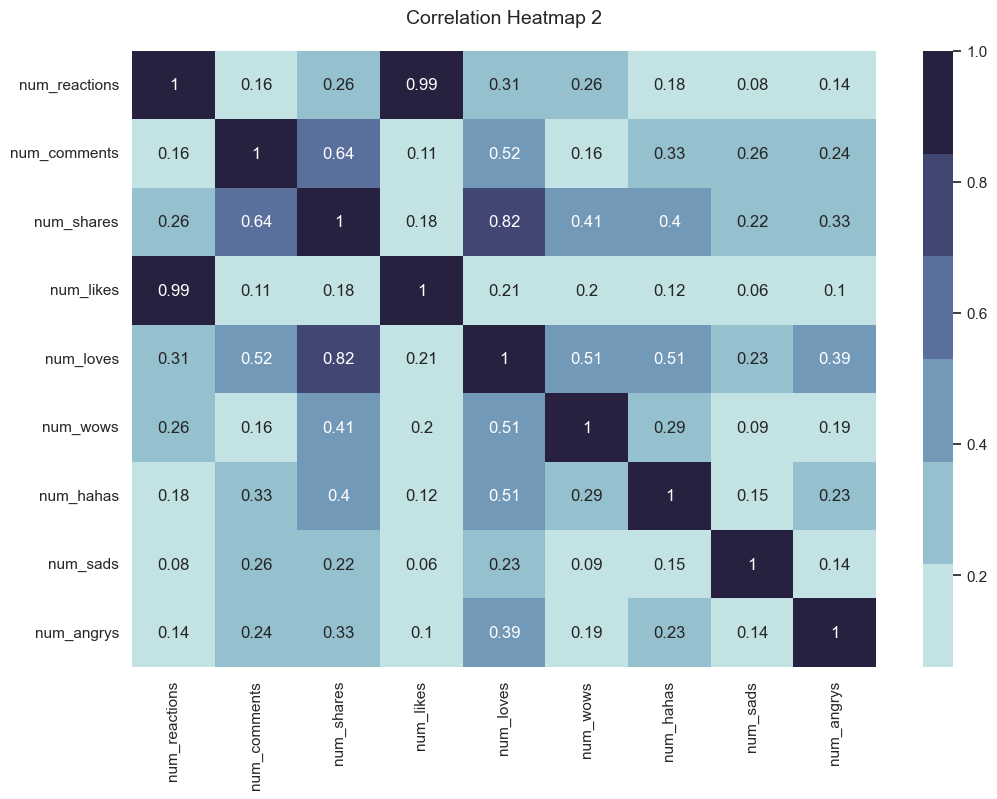

In [590]:
# Correlation heatmap plot

cmap = sns.color_palette("ch:start=.2,rot=-.3")

plt.figure(figsize=(12,8))
sns.heatmap(fbthaifinal_data[num_columns].corr().round(2), annot=True, cmap=cmap)
plt.title('Correlation Heatmap 2', fontsize=14, pad=20)

### **1. Clasifica los diferentes registros utilizando el PCA y el algoritmo K-means.**

### **- > PCA**

* El análisis de componentes principales (PCA, Principal Component Analysis) se utiliza para reducir la dimensionalidad del dataset, manteniendo gran parte de la información relevante. 
* PCA busca encontrar las combinaciones lineales óptimas de las variables originales para crear nuevas variables llamadas componentes principales. 
* Aplicamos el PCA sólo a las variables numéricas, no a las dummias.

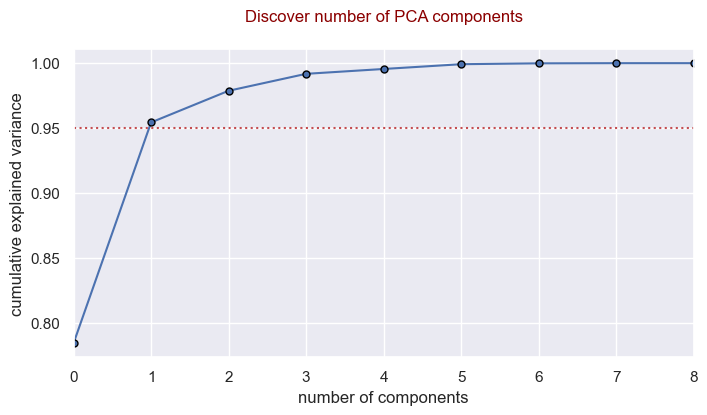

In [591]:
# import libraries to apply PCA method
from sklearn.decomposition import PCA


# Create a plot to see how many PC will be optim to use
pca = PCA().fit(fbthaifinal_data[num_columns])
plt.figure(figsize = (8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o", markersize=5, markeredgecolor='black')
plt.axhline(0.95, color = "r", linestyle = ":")
plt.xlim([0, 8])
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");
plt.title("Discover number of PCA components", fontsize=12, pad=20, color='darkred')
plt.show()

* Podemos comprobar que con n_components = 1 o n_components = 2 sería suficiente para superar el 95% de la información recogida. 
* Un mayor número de componentes nos aportaría más precisión pero podría aumentar la complejidad de los modelos y de buscar patrones.
* Reducir la dimensionalidad simplifica el uso de los datos y facilita su interpretación.

In [592]:
# Call pca method with n_components = 3 and fit it

pca = PCA(n_components=3)
pca.fit(fbthaifinal_data[num_columns])

# Show % of the cumulative explained variance we will keep with 2 PC. 
np.cumsum(pca.explained_variance_ratio_)

array([0.78433389, 0.95436196, 0.97873021])

In [593]:
#Aplicamos PCA a 2 componentes
pca = PCA(n_components=2)
pca.fit(fbthaifinal_data[num_columns])#aplico nomes a les dades numeriques no dumificades

# ajuste y transformación del dataset con PCA
fb_thai_pca = pd.DataFrame(pca.transform(fbthaifinal_data[num_columns]), columns=["PC1", "PC2"], index=fbthaifinal_data.index)

# Mostrar el resultado del nuevo dataframe que debería contener casi todos los datos originales 
fb_thai_pca.head(10)

,PC1,PC2
0,48.137583,39.279458
1,-14.877927,-2.241906
2,3.367097,3.437490
3,-14.882011,-2.248534
4,-14.272233,-1.395370
5,-14.269646,-1.785843
6,22.832830,1.436127
7,11.233651,-2.368089
8,-14.504016,-1.796786
9,-14.209598,-2.035047


### **- > K-means**

* El algoritmo KMeans agrupa los datos intentando separar muestras en n grupos de varianzas iguales, minimizando un criterio conocido como inercia, se puede reconocer como una medida de la coherencia interna de los clusters.
* Divide un conjunto de N muestras X en K grupos C disjuntos, cada uno descrito por la media j de las muestras del cluster. Las medias se llaman comúnmente a los centroides del clúster.
* Tiene como objetivo elegir los centroides que minimicen la inercia, o la suma dentro del cluster del criterio al cuadrado.

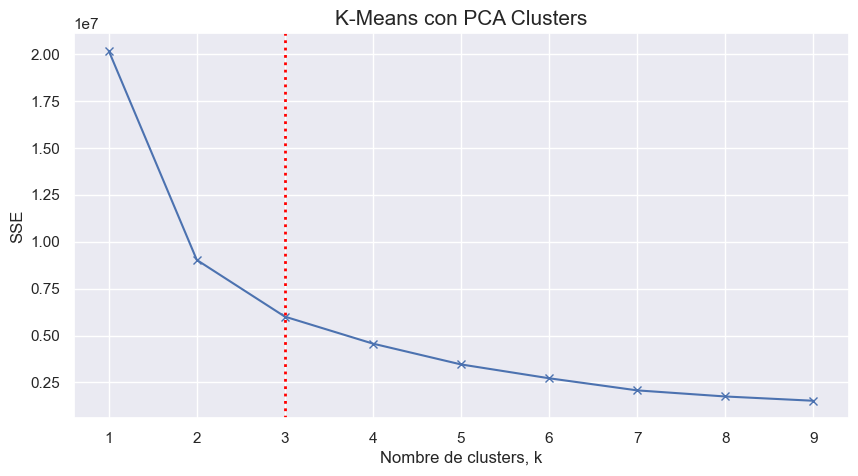

In [594]:
from sklearn.cluster import KMeans
ks = range(1, 10)
# SSE es (Sum of Squared errors)
SSE = []

for i in range(1, 10):
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=i, random_state= 35)
    
    # Fit model to samples
    kmeans.fit(fb_thai_pca)
    
    # Append the inertia to the list of inertias
    SSE.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))    
plt.plot(ks, SSE, '-o', marker='x')
plt.axvline(x = 3, ymin = 0, color = 'red', linewidth =2, ls = ':' )
plt.xlabel('Nombre de clusters, k')
plt.ylabel('SSE')
plt.title('K-Means con PCA Clusters', fontsize=15)
plt.xticks(ks)
plt.show()

In [595]:
from kneed import KneeLocator
kl = KneeLocator(ks, SSE, curve="convex", direction="decreasing")
print('Nombre óptim de clusters (k):', kl.elbow)

Nombre óptim de clusters (k): 3


**- > La función *kneelocator* apunta q que el número óptimo de clusters és 3**

In [596]:
## Instanciamos de nuevo el K-means con 3 clusters i el mismo seed :
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 35)

##Fit el K-means a los datos para obtener los clusters
kmeans_pca.fit(fb_thai_pca)

KMeans(n_clusters=3, random_state=35)

In [597]:
# Recogemos los diferentes clusters obtenidos por kmeans

clusterKm = kmeans_pca.predict(fb_thai_pca)
clusterKm

array([1, 0, 0, ..., 0, 0, 0])

### **K-Means model y los parámetros**

In [598]:
# Predict to assign each 
y_pred = kmeans_pca.predict(fb_thai_pca)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [599]:
centroids = kmeans_pca.cluster_centers_
centroids

array([[-11.09948941,  -1.20227919],
       [100.17115574,  25.01574856],
       [335.02331103, -56.9661359 ]])

**- > INERCIA** : A menor inercia, mejor ajuste del modelo. 
* Al contrario, vemos que este modelo tiene una inercia alta, lo que indica que quizás no es un modelo que se ajuste bien a los datos. 
* También puede ser la presencia de outliers alejados de los demás puntos la que distorsiona o influye en el cálculo de la inercia.


In [600]:
kmeans_pca.inertia_

6010591.631429629

In [601]:
# Create new column with the cluster assgined for each instance
fbthai_data_dummy['clusterkm'] = y_pred

#Show first rows
fbthai_data_dummy.head()


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417,Saturday,Sunday,Workday,time_day,year,clusterkm
0,video,529,512,262,432,92,3,1,1,0,...,0,0,0,0,0,1,0,morning,2018,1
1,photo,150,0,0,150,0,0,0,0,0,...,0,0,0,0,1,0,0,night,2018,0
2,video,227,236,57,204,21,1,1,0,0,...,0,0,0,0,1,0,0,morning,2018,0
3,photo,111,0,0,111,0,0,0,0,0,...,0,0,0,0,1,0,0,night,2018,0
4,photo,213,0,0,204,9,0,0,0,0,...,0,0,0,0,0,0,1,night,2018,0


In [602]:
fbthai_data_dummy['clusterkm'].value_counts()

0    6450
1     475
2      72
Name: clusterkm, dtype: int64

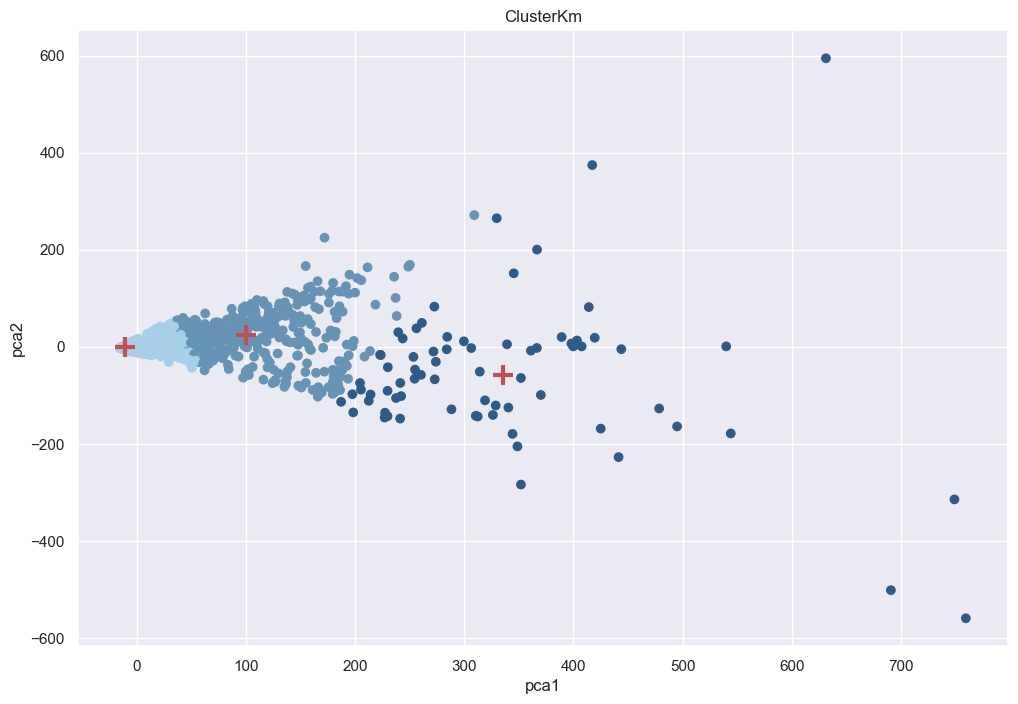

In [603]:
# Crear el gráfico de dispersión con diferentes colores para los clusters
colors = ListedColormap(['#A8CFE8', '#6793B5', '#2E5B88'])
cmap = sns.color_palette("ch:start=.2,rot=-.3")

plt.figure(figsize=(12, 8))
plt.scatter(fb_thai_pca.iloc[:, 0], fb_thai_pca.iloc[:, 1], c=clusterKm, cmap=colors)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=200, linewidths=3, color='r')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('ClusterKm')
plt.show()

**A continuacón, vemos el estudio gráfico de las columnas y las observaciones posteriores relacionadas:**

 
* Tras visualizar las variables numéricas, podemos decir que :
    - de los tres clusters el que incluye más tipos de estados es el primero [index 0].
    - Status_type : el primer clúster reúne elementos de las 4 categorías, mientras que los otros dos, sólamente fotos y vídeos
    - num_reactions : el primer clúster de nuevo reúne más elementos y el tercero, el que menos.
    - num_comments y num_shares : el tercer clúster [index 2] reúne los elementos con mayor influencia en estas dos categorías, quizás más "interesantes" y seguramente más comentados.
    - num_likes : en el primer clúster se encuentran las publicaciones que generaron más "me gusta" ;
    - pero las que más "me encanta" obtuvieron y con diferenciia, están el en clúster 2 [index 1] y tambén en el tercero, aunque en menor número. 
    - como en el caso de los "me encanta", los elementos que generaron más "wows" coinciden también con el clúster 2 [index 1] y con el tercero. 
    - las mayores risas (num_hahas) se encuentran primero en el clúster 2 y en menor medida en el primero. 
    - las caritas tristes, en cambio, comparten el clúster primero, justo a las publicaciones que han agradado y etiquetadas como "likes". A veces una publicación puede ser "buena", a la vez que tristeza, o que parte de las personas no estén de acuerdo con ello y por tanto, veammos cierta ambivalencia. Por esta razón el los clúster 2 y 3 hay muchas menos caritas tristes y donde se obtuvieron más sentimientos extremadamente positivos. Por otro lado, volviendo al primer gráfico de esta serie, es donde únicamente encontramos fotos y videos.
    
    
* Dicho esto, se observa una **diferencia marcada entre las publicaciones que generan "likes" y las que generan "loves" y "wows"** ; podríamos pensar que el "love" es más veraz y espontáneo, mientras que el "like" es el más antiguo delos emojis y el más habitual, más fácil de poner, incluso como para decir "afirmativo", o que simplemente estamos de acuerdo con lo que vemos, sin necesariamente encontrar en nosotros sentimientos de amor o de eufória, mientras que el "love" es reservado para cosas que realmente nos gustan o nos importan más de lo habitual. También es **donde únicamente encontramos fotos y videos**.

<Figure size 500x300 with 0 Axes>

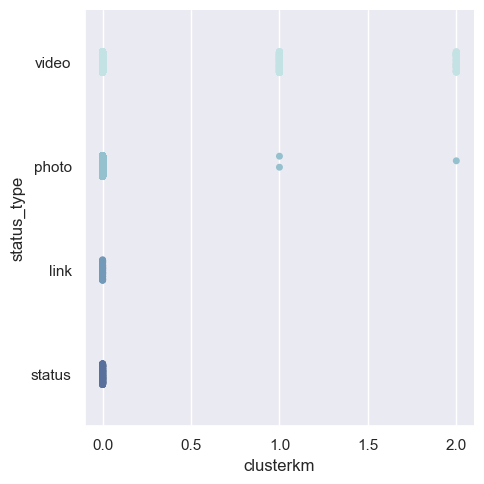

<Figure size 500x300 with 0 Axes>

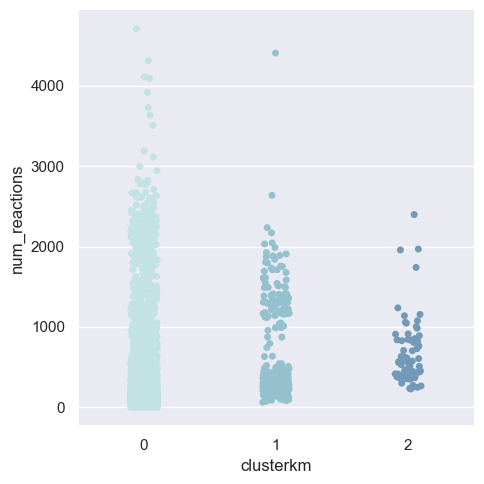

<Figure size 500x300 with 0 Axes>

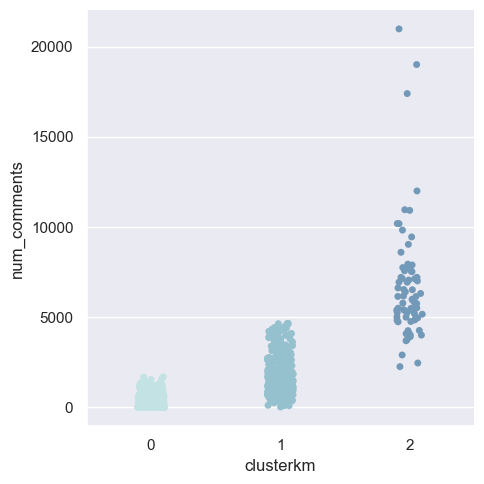

<Figure size 500x300 with 0 Axes>

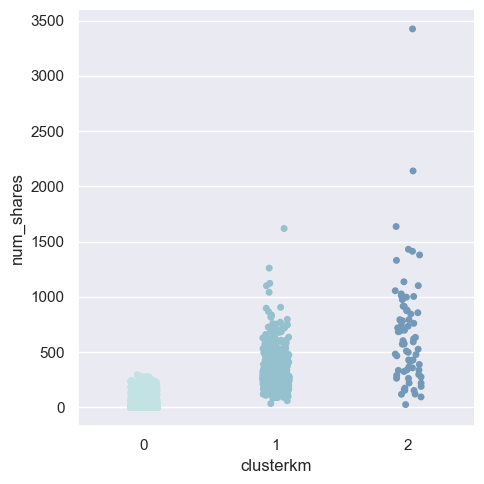

<Figure size 500x300 with 0 Axes>

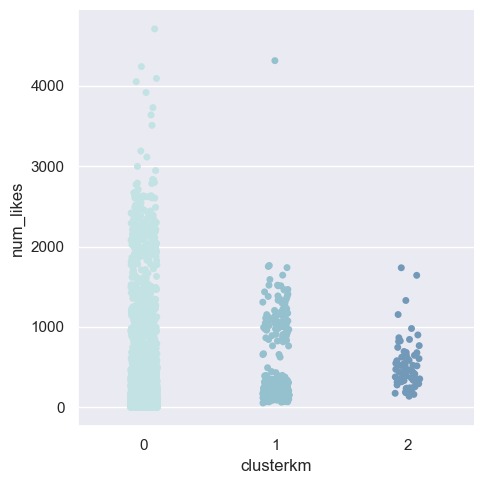

<Figure size 500x300 with 0 Axes>

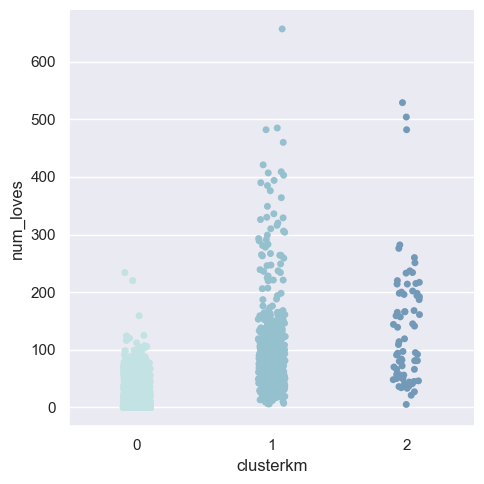

<Figure size 500x300 with 0 Axes>

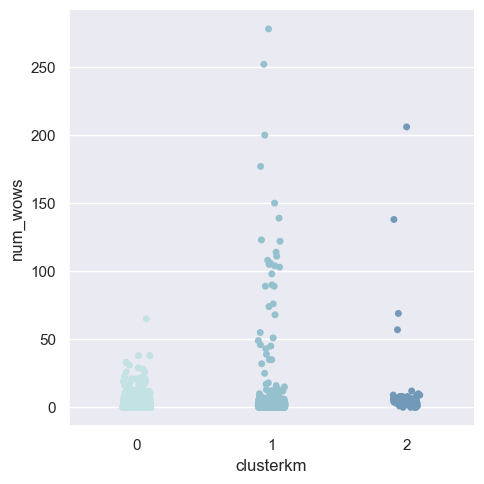

<Figure size 500x300 with 0 Axes>

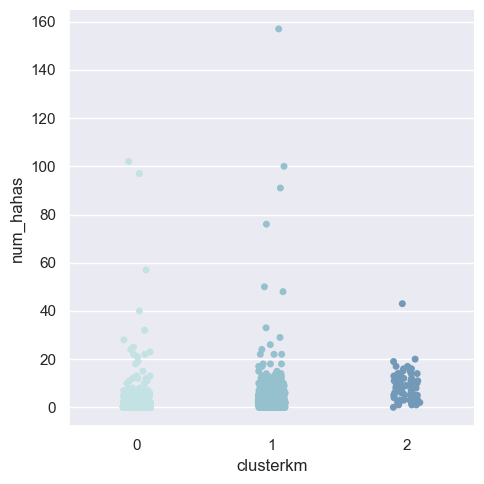

<Figure size 500x300 with 0 Axes>

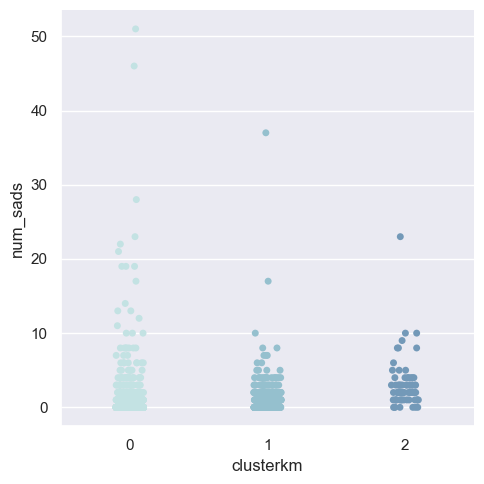

In [604]:
columns=fbthai_data_dummy.columns[0:9]

for i in columns:
    plt.figure(figsize=(5, 3))
    plt.tight_layout()
    sns.catplot(x="clusterkm", y=i, data=fbthai_data1, palette=sns.color_palette("ch:start=.2,rot=-.3"))
    plt.show()

*  Como visualización extra, se va a mirar los datos que acabamos de ver con la técnica del violín ; los comentarios son los mismos.

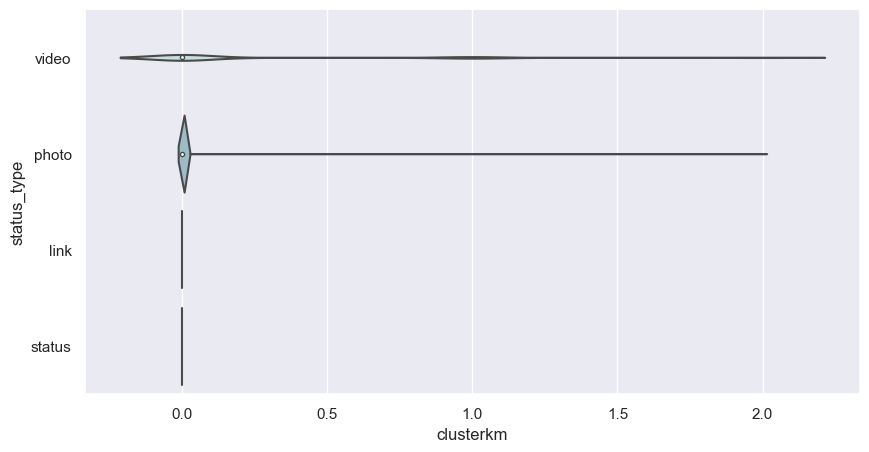

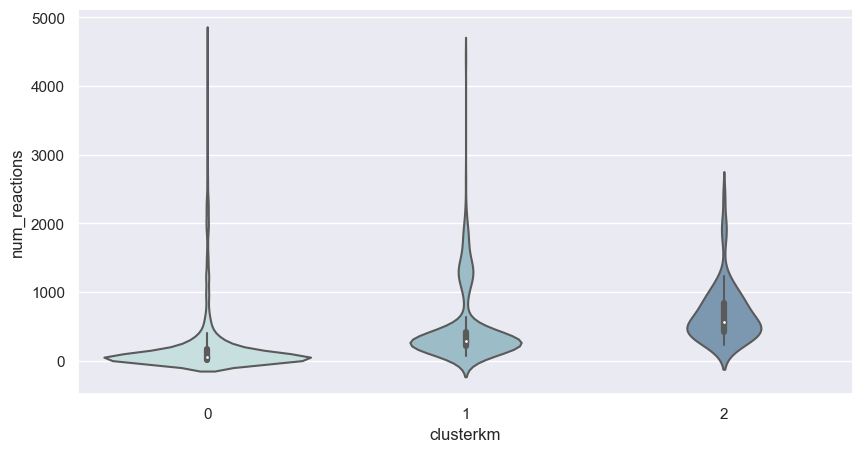

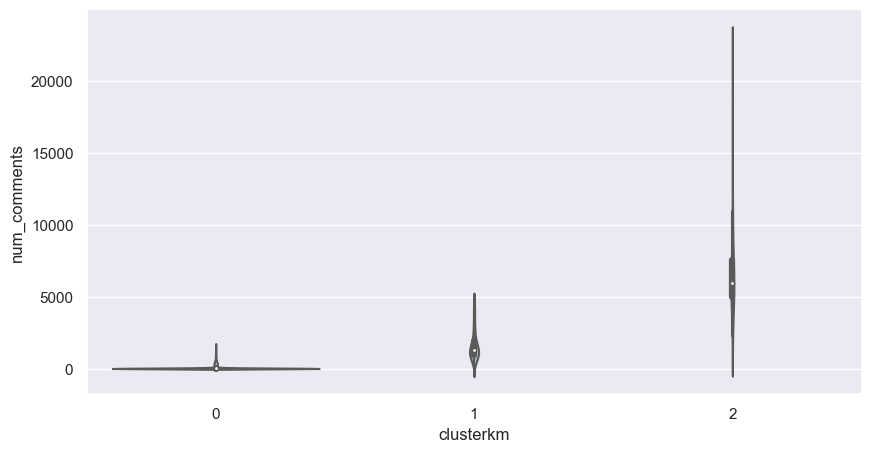

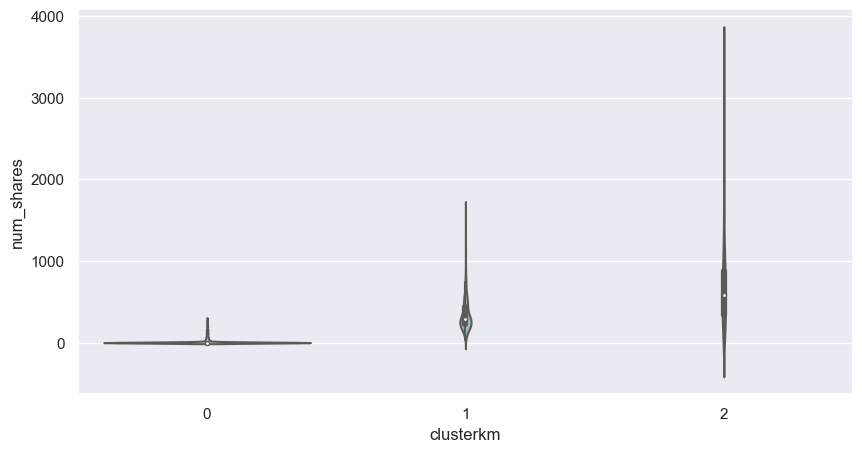

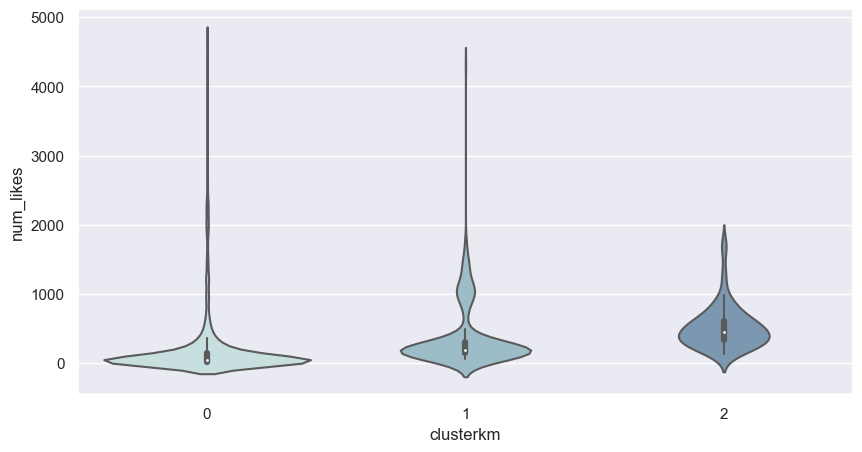

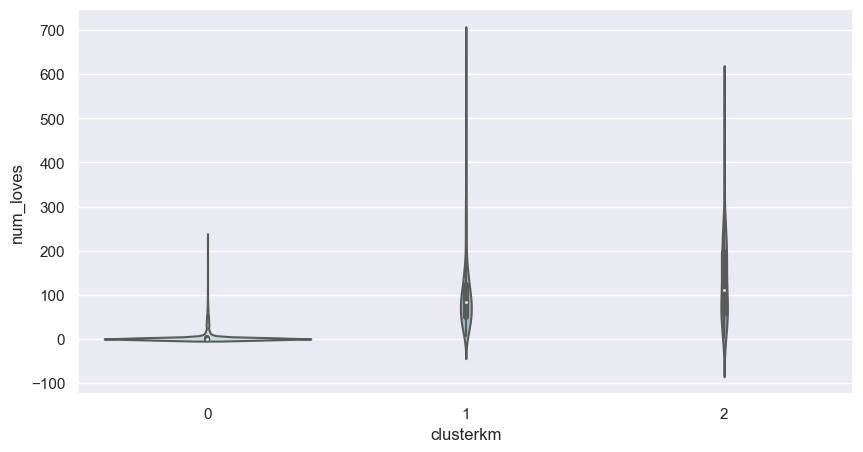

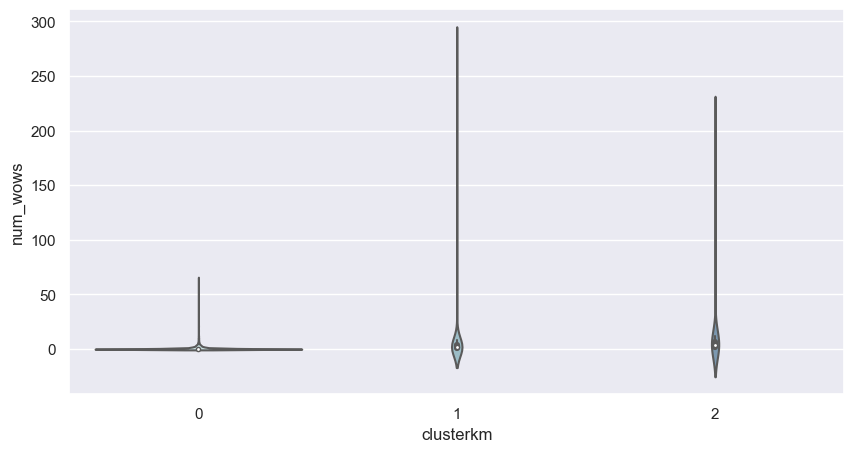

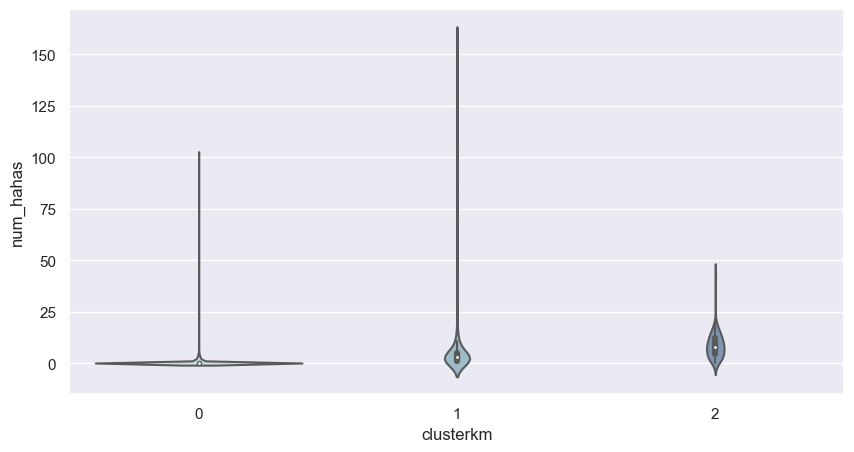

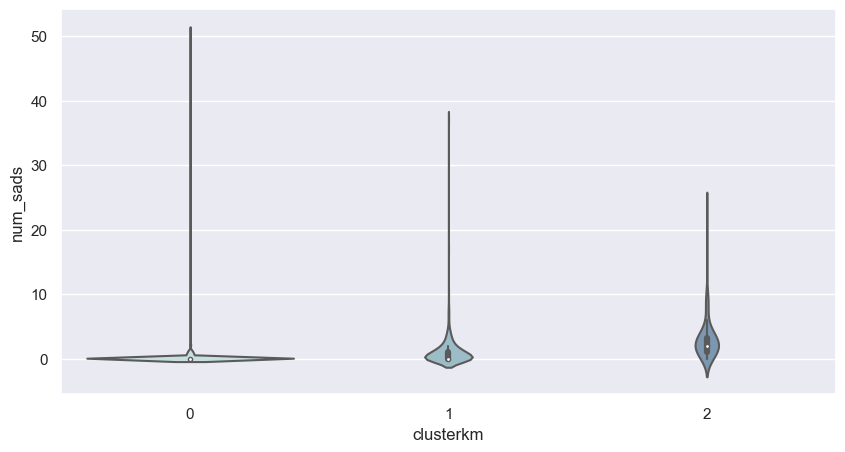

In [605]:
## agafem les columnes per fer l'estudi gràfic:
columns=fbthai_data_dummy.columns[0:9]

# Generar els gràfics de violí
for i in columns:
    plt.figure(figsize=(10, 5))
    plt.tight_layout()
    plt.gca().set(xlabel=i, ylabel='Frequència')
    sns.violinplot(x="clusterkm", y=i, data=fbthai_data1, palette=sns.color_palette("ch:start=.2,rot=-.3"))
    plt.show()


* A continuación veremos la relación entre el número de reacciones y el número de likes que ya habíamos visto que estaban fuertemente correlacionadas y vemos claramente una relación lineal. Asimismo podemos ver que el primer clúster es el que da mejores resultados con los componentes principales (PCA).

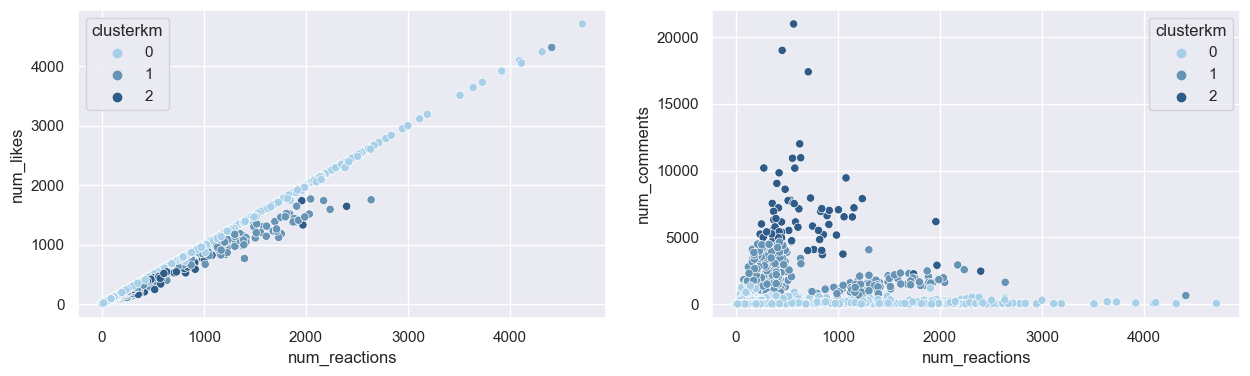

In [606]:
plt.figure(figsize=(15, 4))
colors = ListedColormap(['#A8CFE8', '#6793B5', '#2E5B88'])

plt.subplot(1, 2, 1)
sns.scatterplot(x='num_reactions', y='num_likes', data=fbthai_data_dummy, hue='clusterkm', palette=colors)

plt.subplot(1, 2, 2)
sns.scatterplot(x='num_reactions', y='num_comments', data=fbthai_data_dummy, hue='clusterkm', palette=colors)

plt.show()

**Los gráficos a continuación muestran :**
* Nuevamente vemos que los clusters nos dan una información similar a la anterior : el sábado es el día con más interacciones y el resto de las semana, pocas. 
* Este algoritmo se ajusta algo más a los datos simplemente con el groupby de todo el dataset.
* Similar al principio, tenemos la mayoría de interacciones, además de sábado, en noches y mañanas.
* Que la mayoría de reacciones son sobre foros o vídeos
* Que los clústers 2 y 3, que incluían la mayoría de reacciones de eufória tipo "wow" y "love", aparecen en el año 2017 y 2018, lo que puede hacernos pensar dos cosas : o bien que las publicaciones de los vendedores se hicieron realmente más interesantes en este periodo, o bien que simplemente, la opción de darle algo más que un "like" no existía antes, y que ahora con la evolución de internet, el usuario tenga más posibilidades de expresarse. Al principio de Facebook Live, es posible de que sólo tuviesen botones para dar un "like", comentar, compartir y poco más.


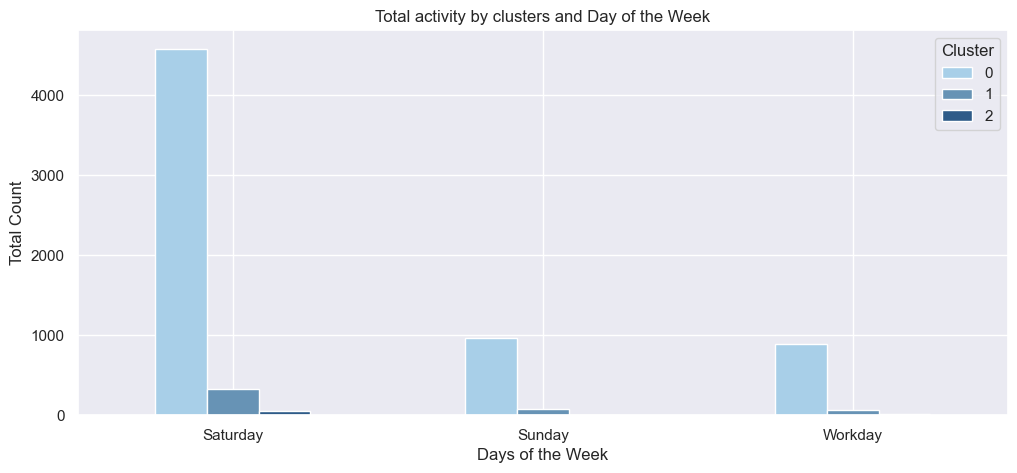

In [607]:
dataday = fbthai_data_dummy.groupby(['Saturday', 'Sunday', 'Workday'])['clusterkm'].value_counts().unstack().fillna(0)
colors = ListedColormap(['#A8CFE8', '#6793B5', '#2E5B88'])

fig, axs = plt.subplots(figsize=(12, 5))

dataday.plot(kind='bar', ax=axs, cmap=colors)
axs.set_xticklabels(['Saturday', 'Sunday', 'Workday'], rotation=0)
axs.set_xlabel('Days of the Week')
axs.set_ylabel('Total Count')
axs.set_title('Total activity by clusters and Day of the Week')
axs.legend(title='Cluster')

plt.show()

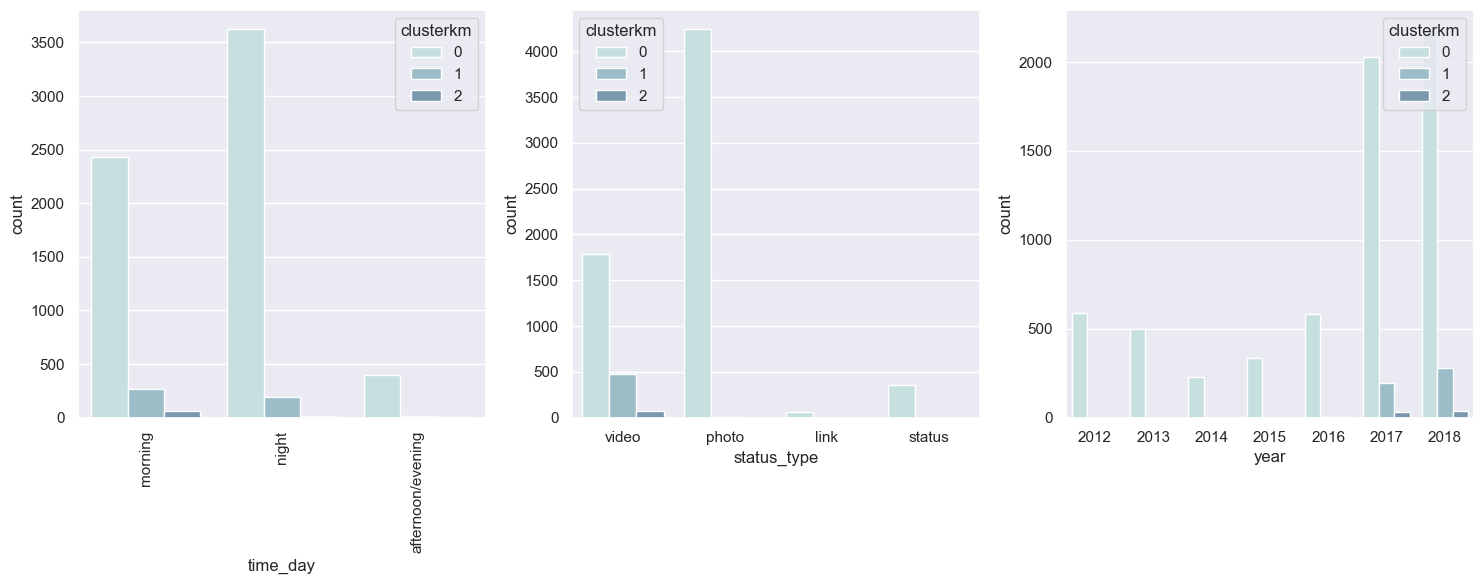

In [608]:
plt.figure(figsize=(15, 6))
colors = ListedColormap(['#A8CFE8', '#6793B5', '#2E5B88'])

plt.subplot(1, 3, 1)
ax = sns.countplot(x="time_day", hue="clusterkm", data = fbthai_data_dummy, palette=sns.color_palette("ch:start=.2,rot=-.3"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.subplot(1, 3, 2)
sns.countplot(x="status_type", hue="clusterkm", data=fbthai_data_dummy, palette=sns.color_palette("ch:start=.2,rot=-.3"))

plt.subplot(1, 3, 3)
sns.countplot(x="year", hue="clusterkm", data=fbthai_data_dummy, palette=sns.color_palette("ch:start=.2,rot=-.3"))
plt.tight_layout()  

plt.show()



### **2. Clasifica los diferentes registros usando el algorítmo de clústering jerárquico.**


**Método del dendrograma :** 
* Los datos ya están preprocesados, pero hay que saber cuál es el número de clusters óptimo. No existe una forma definitiva de encontrar el número óptimo de clusters, ya que depende del conjunto de datos y del contexto del problema, pero el método del dendrograma muestra la jerarquía de clusters a medida que se van fusionando. 
* Se observan las distancias en el eje vertical del dendrograma y se buscan las mayores distancias entre las uniones de clusters. Ésta puede ser una indicación del número de clusters adecuado. 
* Probaremos de generar un dendrograma con los últimos 15 clusters fusionados por no utilizar demasiado memoria.
* Observamos la distancia entre las sucesivas fusiones de clusters en el dendrograma y buscamos un punto donde esta distancia disminuye significativamente. Este punto indica un cambio sustancial en la estructura de los clusters y puede ayudar en encontrar el número óptimo de clusters.


**Observaciones :**
* Podemos seleccionar el número de clusters deseados mirando las distancias entre las uniones de clusters y trazando una línea horizontal. Los clusters serán las agrupaciones de muestras bajo esta línea.
* Este método es exploratorio y sujeto a interpretación. 
* La elección del número de clusters depende de su interpretación del dendrograma y de sus necesidades específicas.

In [609]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

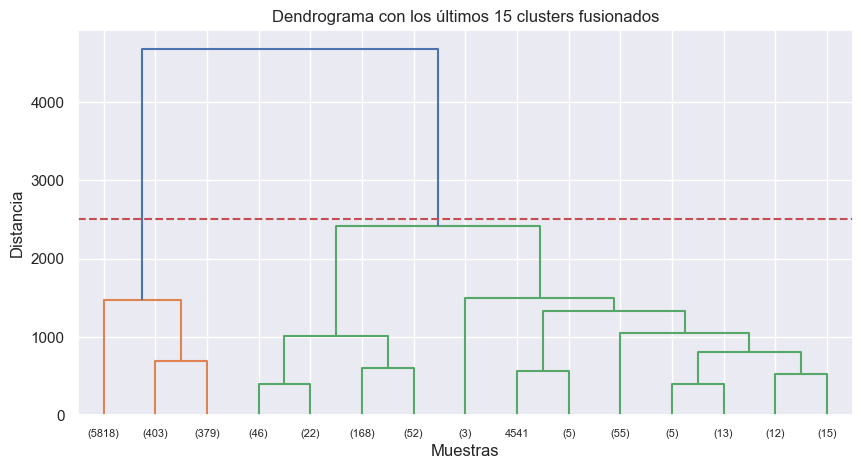

Nombre de clusters: 2


In [611]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Càlcul de la matriu de vincles
Z = linkage(fb_thai_pca.values, method='ward')

p = 15  # Nombre de merged clusters a mostrar
plt.figure(figsize=(10, 5))
dendrogram(Z,leaf_font_size=8,truncate_mode='lastp', p=p)

# Determinem el punt de tall automàtic per obtenir els clusters
max_d = 2500  # Valor de tall desitjat
clusters = fcluster(Z, max_d, criterion='distance')

plt.axhline(y=max_d, color='r', linestyle='--')  # Línia horitzontal del punt de tall
plt.title('Dendrograma con los últimos 15 clusters fusionados')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

# Nombre de clusters determinat pel punt de tall
num_clusters = len(set(clusters))
print("Nombre de clusters:", num_clusters)


**Clustering jerárquico aglomerativo :**

* Este algorítmo agrupa los datos a partir de la proximidad entre ellos. Este método primero asume que cada observación de los datos es un cluster individual para después va fusionando iterativamente los clusters más cercanos hasta que obtenga un único clúster que contenga todos los datos.

In [612]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(fb_thai_pca)

clusterHyerarchy = model.labels_
clusterHyerarchy


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [613]:
fbthai_data_dummy['ClusterHyerarchy'] = clusterHyerarchy
fbthai_data_dummy.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,ID_725980084255106,ID_819700534875473,ID_848451358648417,Saturday,Sunday,Workday,time_day,year,clusterkm,ClusterHyerarchy
0,video,529,512,262,432,92,3,1,1,0,...,0,0,0,0,1,0,morning,2018,1,1
1,photo,150,0,0,150,0,0,0,0,0,...,0,0,0,1,0,0,night,2018,0,1
2,video,227,236,57,204,21,1,1,0,0,...,0,0,0,1,0,0,morning,2018,0,1
3,photo,111,0,0,111,0,0,0,0,0,...,0,0,0,1,0,0,night,2018,0,1
4,photo,213,0,0,204,9,0,0,0,0,...,0,0,0,0,0,1,night,2018,0,1


In [614]:
fbthai_data_dummy['ClusterHyerarchy'].value_counts()

1    6600
0     397
Name: ClusterHyerarchy, dtype: int64

**- > vemos que en vez de 3 clusters como con K-means, ahora con AgglomerativeClustering se han obtenido 2 clusters,con cantidades muy desigualadas**

**Antes :**
fbthai_data_dummy['clusterkm'].value_counts()

    0    6450

    1     475

    2      72

**Ahora :**
fbthai_data_dummy['ClusterHyerarchy'].value_counts()

    1    6600
    
    0     397



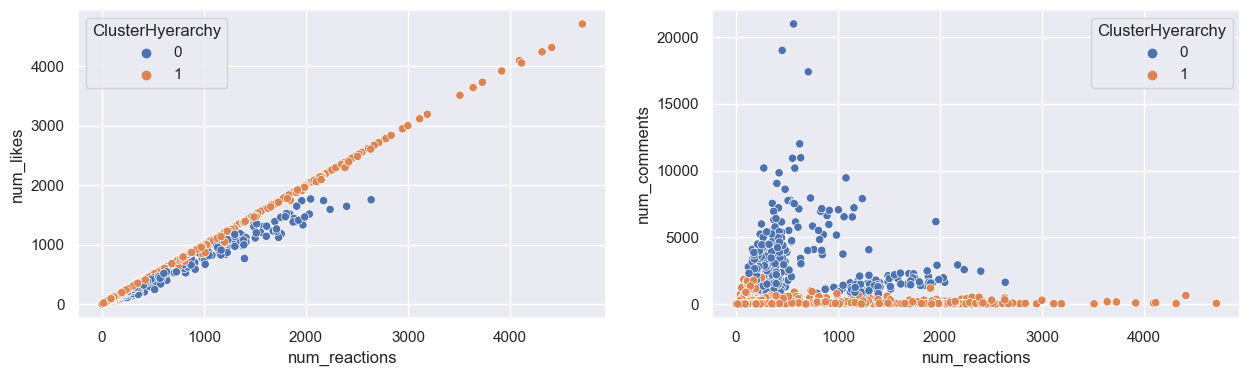

In [615]:
plt.figure(figsize=(15, 4))
colors = ListedColormap(['#A8CFE8', '#6793B5', '#2E5B88'])
cmap = sns.color_palette("ch:start=.2,rot=-.3")

plt.subplot(1, 2, 1)
sns.scatterplot(x='num_reactions', y='num_likes', data=fbthai_data_dummy, hue='ClusterHyerarchy', cmap=colors)

plt.subplot(1, 2, 2)
sns.scatterplot(x='num_reactions', y='num_comments', data=fbthai_data_dummy, hue='ClusterHyerarchy', cmap=colors)

plt.show()

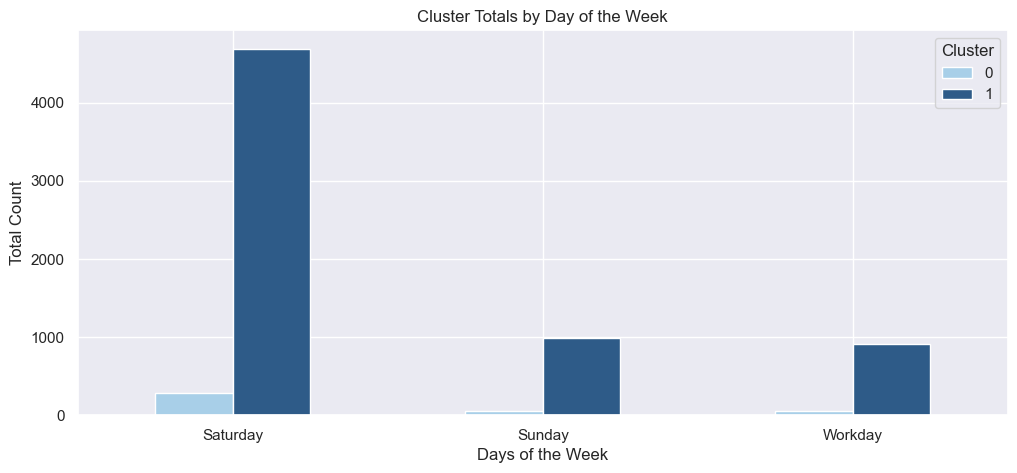

In [616]:
dataday = fbthai_data_dummy.groupby(['Saturday', 'Sunday', 'Workday'])['ClusterHyerarchy'].value_counts().unstack().fillna(0)

fig, axs = plt.subplots(figsize=(12, 5))

dataday.plot(kind='bar', ax=axs, cmap=colors)
axs.set_xticklabels(['Saturday', 'Sunday', 'Workday'], rotation=0)
axs.set_xlabel('Days of the Week')
axs.set_ylabel('Total Count')
axs.set_title('Cluster Totals by Day of the Week')
axs.legend(title='Cluster')

plt.show()

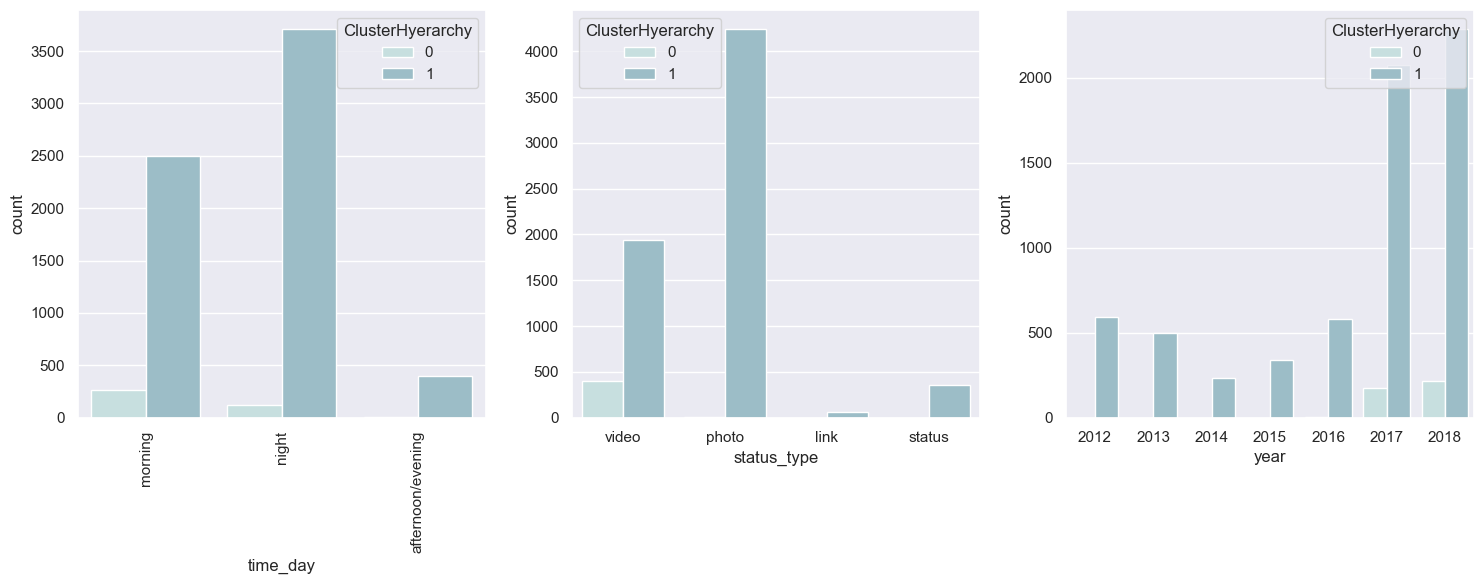

In [617]:
colors = ListedColormap(['#A8CFE8', '#6793B5', '#2E5B88'])
cmap = sns.color_palette("ch:start=.2,rot=-.3")

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)

ax = sns.countplot(x="time_day", hue="ClusterHyerarchy", data=fbthai_data_dummy, palette=sns.color_palette("ch:start=.2,rot=-.3"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.subplot(1, 3, 2)
sns.countplot(x="status_type", hue="ClusterHyerarchy", data=fbthai_data_dummy, palette=sns.color_palette("ch:start=.2,rot=-.3"))

plt.subplot(1, 3, 3)
sns.countplot(x="year", hue="ClusterHyerarchy", data=fbthai_data_dummy, palette=sns.color_palette("ch:start=.2,rot=-.3"))
plt.tight_layout()  
plt.show()

### **3. Calcula el rendimiento del clustering mediante el parámetro silhouette.**

In [618]:
from sklearn.metrics import silhouette_score

# Calculamos el rendimiento con silhouette por cada algoritmo

kmeans_silhouette = silhouette_score(fb_thai_pca, y_pred)
agglo_silhouette = silhouette_score(fb_thai_pca, clusterHyer)

print("Rendiment Kmeans: {:.2f}%".format(kmeans_silhouette * 100))
print("Rendiment Hierarchical: {:.2f}%".format(agglo_silhouette * 100))


Rendiment Kmeans: 87.65%
Rendiment Hierarchical: 89.32%


* Vemos que los clusters jerarquicos dan ligeramente mejor resultado que con K-means.

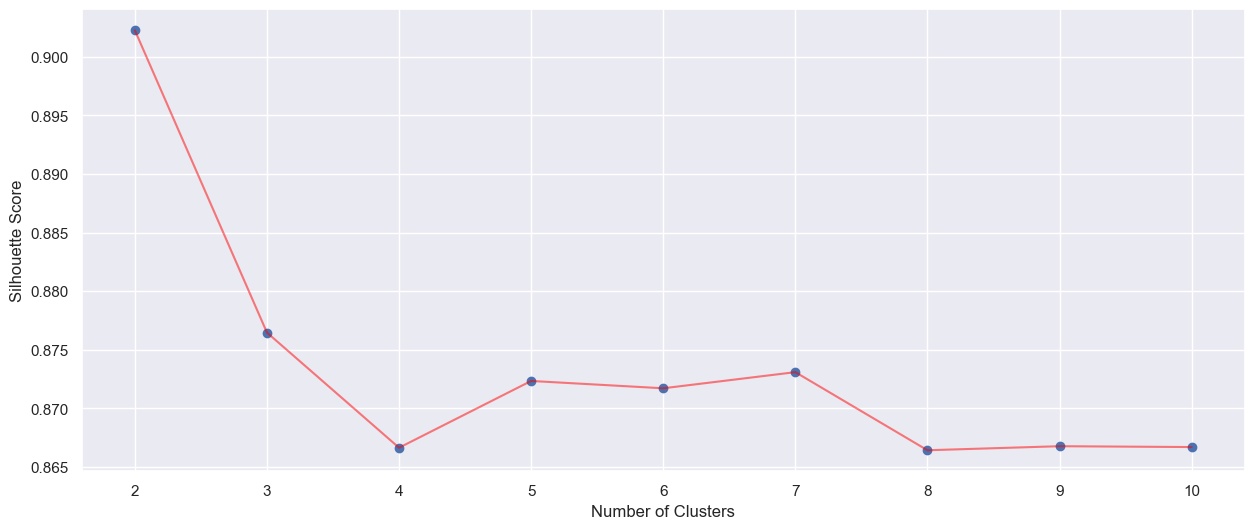

In [619]:
# Visualizamos el scoring amb Silhouette con K-means con el mismo random state

ss_all = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 35))
    predict = km.fit_predict(fb_thai_pca)
    score = silhouette_score(X = fb_thai_pca, labels = predict)
    ss_all.append(score)
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'o')

#plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined") ##plot with label
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'red')

#plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

In [620]:
# Calculamos el silhouette score

ss_all = []
for n in range(2, 11):
    ac = (AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward'))
    predict = ac.fit_predict(fb_thai_pca)
    score = silhouette_score(X = fb_thai_pca, labels = predict)
    ss_all.append(score)

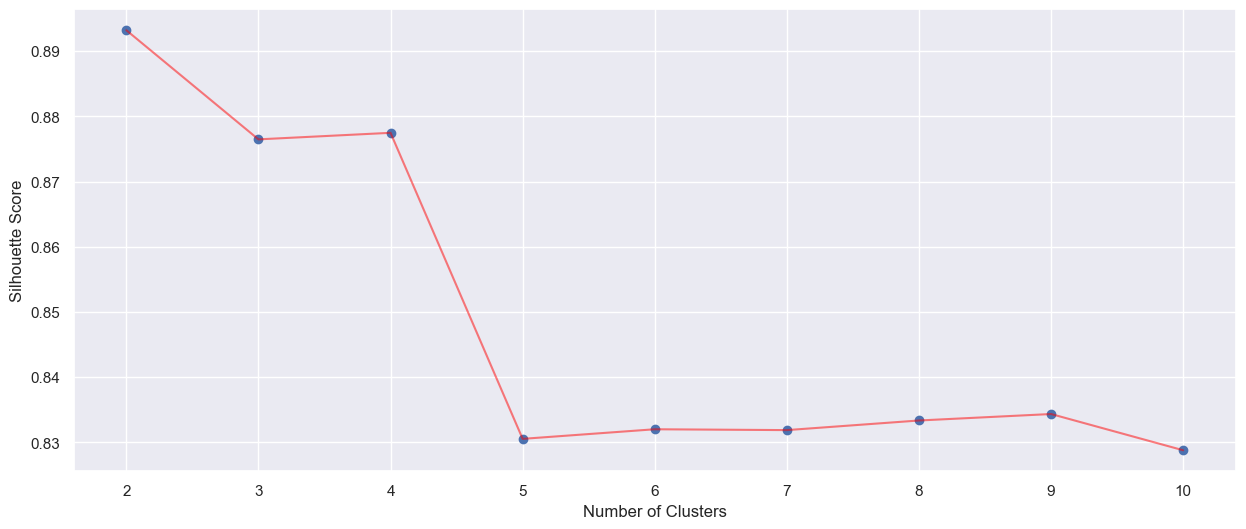

In [621]:
# Vemos número de clusters vs el silhouette score para este dataset. https://statisticallyrelevant.com/k-means-clustering-in-python/

plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'o')

#plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined") ##plot with label
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'red')

#plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

* En ambos casos se ha aplicado el número correcto de clusters para el mejor rendimiento.

* El algoritmo K-means se utiliza con datos numéricos continuos y agrupa observaciones en clusters basados en su similitud. Pero cuando se trabaja con conjuntos de datos que contienen variables categóricas, el algoritmo K-means no es el más apropiado, puesto que le cuesta trabajar con este tipo de datos.

* El K-modos es útil cuando se trabaja con bases de datos que contienen variables categóricas, ya que puede agrupar correctamente las observaciones en función de la similitud en las variables categóricas.

* K-modes no funciona con PCA ya que es por variables categoricas, se podría intentar hacer k-modes por las categóricas y obtener una visión global de la segmentación.